# EDA on Car Sales 
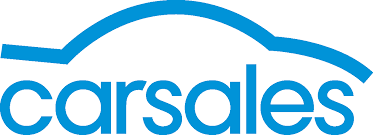

## Presented by: Dhiraj Kulkarni

## 1. Problem Statement
The given data set covers the car sales data. The data covers sales data for a number of car manufacturers for a few years. Key data points include price, year along with details such as model, engine type, engine capacity, mileage, car body & drive type (front or rear).
We will look at the data from different angles to identify any patterns which can be used to derive actionable insights.
<br>The umbreall problem is to provide insights to car manufactuerers on trends in car sales and suggest future designs - e.g. based on trends whether the customers prefer a sedan or crossover, a diesel engine or hybrid, which price range is ilkely to have most demand etc.

## 2. Importing the packages

In [2]:
import pandas as pd
import numpy as np

pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [4]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

## 3. Loading the data

In [5]:
# Lets read the data from car_sales.csv file in to pandas DaFrame & print sample records

df_car = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv',encoding = 'latin-1') 
df_car.sample(5)

,car,price,body,mileage,engV,engType,registration,year,model,drive
2834,Kia,13000.0,sedan,64,1.6,Gas,yes,2013,Rio,front
6932,Land Rover,7800.0,crossover,355,3.0,Diesel,no,2003,Range Rover,full
6708,Mercedes-Benz,14899.0,other,209,3.0,Diesel,yes,2006,E-Class,rear
8959,Mercedes-Benz,12900.0,sedan,255,2.7,Diesel,yes,2003,E-Class,rear
8836,Chevrolet,4300.0,crossover,150,1.7,Petrol,yes,2004,Niva,full


  - 3.1 [Description of the Dataset](#section301)<br>
 

In [6]:
df_car.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


## Observations<br>

<font color=blue>


- There is missing data for variables 'engV' and 'drive'<br>
- Maximum cars belong to manufacturer Volkswagon with about 10% of the data<br>
- The data covers 87 different manufacturers<br>
- 'sedan' seems to be the most popular car body type with more than a third of vehicles in the dataset<br>
- Maximum number of people petrol cars with 'Petrol' engine (engType)<br>
- Max Price for a car is 547800, need to validate this as it seems way too high..i.e. about 30x the mean price...potentailly an outlier<br>
- Minimum Price for a car is Zero, which clearly look incorrect<br>
- Minimum and Maximum mileage is 0 and 999 respectively which both look incorrect and need to be validated<br> 
- Minimum and Maximum engV is 0.1 and 99.99 respectively which both look incorrect and need to be validated<br>
- The data suggest Front drive cars are the most popular among by buyers 
</font>

  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>

In [606]:
from pandas_profiling import ProfileReport

In [32]:
profile = ProfileReport(df_car, title='Pandas Pre-Profiling Report on Car Sales Data', html={'style':{'full_width':True}})
profile.to_file(output_file='Pre-profile car sales.html')

## Pre-profiling Report
### Dataset info
- Number of variables	10
- Number of observations	9576- 
- Missing cells	945 (1.0- %)
- Duplicate rows	113 (1.2%)
- Total size in memory	3.7 MiB
- Average record size in memory	409.9 B

### Variables types

- CAT	5
- NUM	4
- BOOL	1

### Warnings

- Dataset has 113 (1.2%) duplicate rows	Warning
- car has a high cardinality: 87 distinct values	Warning
- drive has 511 (5.3%) missing values	Missing
- engV has 434 (4.5%) missing values	Missing
- mileage has 348 (3.6%) zeros	Zeros
- model has a high cardinality: 888 distinct values	Warning
- price has 267 (2.8%) zeros	Zeros

#### 3.3 Intital Exploration of Data

In [388]:
df_car['body'].value_counts()

sedan        3646
crossover    2069
hatch        1252
van          1049
other        838 
vagon        722 
Name: body, dtype: int64

In [389]:
df_car[df_car['price']==0]

,car,price,body,mileage,engV,engType,registration,year,model,drive
20,Land Rover,0.0,crossover,0,4.4,Diesel,yes,2016,Range Rover,full
53,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
70,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
71,Toyota,0.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
90,Porsche,0.0,sedan,22,4.8,Petrol,yes,2014,Panamera,full
...,...,...,...,...,...,...,...,...,...,...
9019,Toyota,0.0,hatch,76,1.0,Petrol,yes,2007,Aygo,front
9025,Mercedes-Benz,0.0,crossover,1,3.0,Petrol,yes,2016,GLE-Class,full
9036,Ford,0.0,other,1,5.0,Petrol,yes,2014,Mustang,rear
9442,Renault,0.0,vagon,137,1.9,Diesel,yes,2008,Kangoo ïàññ.,front


- There are 267 rows where 'price' is zero. Clearly, something that needs to be fixed.

In [391]:
df_car.groupby('car').nunique()

,car,price,body,mileage,engV,engType,registration,year,model,drive
car,,,,,,,,,,
Acura,1,12,2,11,4,3,1,6,5,2
Alfa Romeo,1,10,3,11,6,3,2,7,6,2
Aro,1,1,1,1,1,1,1,1,1,1
Aston Martin,1,2,2,3,1,1,1,3,2,1
Audi,1,275,6,215,26,4,2,33,20,3
...,...,...,...,...,...,...,...,...,...,...
Volvo,1,30,4,24,9,4,2,15,10,3
Wartburg,1,1,1,1,1,1,1,1,1,1
ZAZ,1,67,5,73,9,3,1,25,10,3


 - 87 unique car manufacturers are listed above

In [396]:
df_car_less_than_5=df_car.groupby(by='car').count()[df_car.groupby(by='car').count().price<5]
df_car_less_than_5.shape

(34, 9)

- Out of 87 car companies 'car', 34 have less than 5 records. Do these car companies add value to our analysis?

 #### - Lets set 'car' column as index for the data

In [393]:
df_car.set_index(df_car['car'])

,car,price,body,mileage,engV,engType,registration,year,model,drive
car,,,,,,,,,,
Ford,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
Mercedes-Benz,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
Mercedes-Benz,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
Mercedes-Benz,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
Mercedes-Benz,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
...,...,...,...,...,...,...,...,...,...,...
Hyundai,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
Volkswagen,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
Mercedes-Benz,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full


- Which is the most expensive car in dataset? Is the price realistic?

In [198]:
# Which is the costiest car in dataset
df_car.iloc[df_car['price'].idxmax()]

car               Hyundai     
price             33500       
body              sedan       
mileage           NaN         
engV              2.4         
engType           Petrol      
registration      yes         
year              2016        
model             Sonata      
drive             front       
Drive_front       1           
Drive_full        0           
Drive_rear        0           
Drive_nan         0           
df_decades        (2010, 2020]
body_crossover    0           
body_hatch        0           
body_other        0           
body_sedan        1           
body_vagon        0           
body_van          0           
Name: 742, dtype: object

## 4. Data Processing

#### 4.1 To start with let's get rid of the dupplciate records 

In [7]:
df_car[df_car.duplicated()]

,car,price,body,mileage,engV,engType,registration,year,model,drive
18,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
42,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
70,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
86,Toyota,103999.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
98,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
...,...,...,...,...,...,...,...,...,...,...
9156,Volkswagen,15700.0,sedan,110,1.8,Petrol,yes,2011,Passat B7,front
9163,Mercedes-Benz,20500.0,sedan,222,5.5,Petrol,yes,2006,S 500,rear
9164,VAZ,3900.0,hatch,121,1.4,Petrol,yes,2008,1119,front
9169,Hyundai,12900.0,crossover,49,2.7,Petrol,yes,2008,Tucson,full


#### Deleting the duplicate rows keepin the the first row among the duplciates

In [8]:
# Delete the duplicates and update the original DataFrame
df_car.drop_duplicates(inplace=True)

In [402]:
df_car.shape[0]

9463

 - The number of rows has reduced by 113 (from 9576 to 9463)

#### 4.2 Now, let's look at the missing values 

In [107]:
Total = df_car.isnull().sum().sort_values(ascending=False)
Percent = (df_car.isnull().sum()/df_car.isnull().count()*100).sort_values(ascending=False)
missing_values = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])
print(missing_values)

              Total   Percent
drive         457    5.332555
engV          378    4.410735
model_year    0      0.000000
model         0      0.000000
year          0      0.000000
registration  0      0.000000
engType       0      0.000000
mileage       0      0.000000
body          0      0.000000
price         0      0.000000
car           0      0.000000


- We see that two columns have missing values - 'drive' has maximum missing values (457) followed by 'engV' with 378 missing values

##### Lets find mode for all the columns
- Mode can be one potential option to replace the missing values

In [285]:
df_car.mode(axis=0, numeric_only=False, dropna=True)

,car,price,body,mileage,engV,engType,registration,year,model,drive,model_year,df_decades
0,Volkswagen,8500.0,sedan,1,2.0,Petrol,yes,2008,E-Class,front,Octavia A52012,"(2000, 2010]"


#### 4.3 Processing on 'drive' column

In [404]:
df_car[df_car['drive'].isnull()].groupby(['car', 'model']).count()

price  body  mileage  engV  engType  registration  year  drive
car  model                                                                 
Audi 80      2      2     2        1     2        2             2     0    
     A4      7      7     7        6     7        7             7     0    
     A5      2      2     2        2     2        2             2     0    
     A6      10     10    10       5     10       10            10    0    
     A8      1      1     1        0     1        1             1     0    
...          ..     ..    ..      ..     ..       ..            ..   ..    
ZAZ  110557  1      1     1        1     1        1             1     0    
     Lanos   1      1     1        0     1        1             1     0    
     Sens    1      1     1        0     1        1             1     0    
     Vida    1      1     1        1     1        1             1     0    
ËUAZ 969Ì    1      1     1        1     1        1             1     0    

[283 rows x 8 columns]

#####  Lets explore if we can replace the missing 'drive' values by a combination of 'car', 'model' & 'year'....Listed below are potential Non-Null values using the defined the group

In [446]:
df_car[~(df_car['drive'].isnull())].groupby(['car', 'model', 'year']).size()

car    model     year
Acura  MDX       2005    1
                 2008    3
                 2014    1
       RL        2006    1
                 2008    1
                        ..
ZX     LandMark  2006    1
ËUAZ   1301      2004    1
       1302      1994    1
       969Ì      1987    1
                 1991    1
Length: 3608, dtype: int64

In [476]:
df_car.groupby(df_car['drive'])['model'].count()

drive
front    5170
full     2418
rear     1359
Name: model, dtype: int64

In [494]:
explode = tuple(np.ones(3)/25)
print(explode)

(0.04, 0.04, 0.04)


Text(0, 0.5, 'Drive')

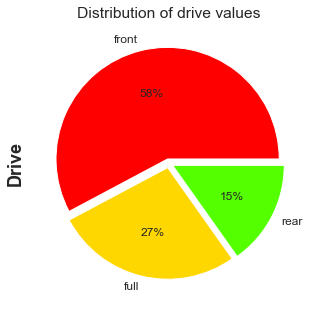

In [482]:
# Lets see the various values for 'drive' along with their share
df_car.groupby(df_car['drive']).count()['body'].plot(kind='pie', autopct='%1.0f%%', 
                                                     figsize=(5, 8), fontsize=12, cmap='prism', explode=explode)
plt.title('Distribution of drive values')
plt.ylabel('Drive', fontsize=18, fontweight="bold")

- It is noted that **Drive** column has three unique values - Front, Full & Rear.
- **58%** of rows have drive as **Front**. We may consider this value to replace the missing values.

### one-hot-encoding on 'drive'
- Since 'drive' is a categorical variable/column with three unique values, we are not able to understand or use it effectively for the analysis.
- Lets use one-hot-encoding and transform this column into numerical columns. After that, we may be able to understand it better.
- This may also help us to devise a method for replacing the null values in the column

In [9]:
# one hot encoding (ohe)
# dummy_na=True 
ohe_drive = pd.get_dummies(df_car['drive'], prefix='Drive', prefix_sep='_', dummy_na=True, columns=['drive'] )

In [10]:
ohe_drive.sample(2)

,Drive_front,Drive_full,Drive_rear,Drive_nan
1373,1,0,0,0
601,0,0,0,1


In [11]:
# To be on safe side, let's create & keep a copy of the dataframe 
df_car_copy = df_car.copy(deep=True)
# and then proceed with joining the ecncoded columns to our dataframe
df_car = df_car.join(ohe_drive)
df_car

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,0,1,0,0
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,0,0,1,0
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,0,0,1,0
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,1,0,0,0
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front,1,0,0,0
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front,1,0,0,0
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full,0,1,0,0
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front,1,0,0,0


- We can see four new columns are added to the dataframe - one each correspopnding to the 'drive' value of front, full, rear & Nan
- We also see that all the informatio  in 'drive' column is now translated to numeric values in the new columns
- Since 'drive' column is now redundant, we will delete it

In [492]:
# Lets drop the 'drive' column ...**Decided to keep this column** also as it can also be useful for certain types of analysis
#df_car.drop('drive', axis=1, inplace=True)

In [12]:
df_car.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,0,1,0,0
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,0,0,1,0
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,0,0,1,0
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,1,0,0,0
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN,0,0,0,1


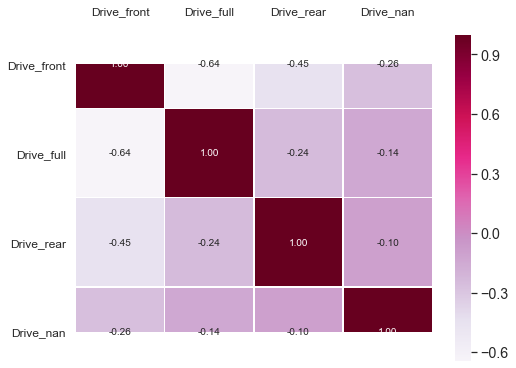

In [275]:
fig,ax = plt.subplots(figsize=(8,6))
corr_drive= ohe_drive.corr()
sns.heatmap(corr_drive, annot=True, fmt='.2f', cmap='PuRd', square=True, linewidth=0.5, ax=ax, cbar=True )
ticks = plt.setp(ax.get_yticklabels(), fontsize='large', rotation=0)
ticks = plt.setp(ax.get_xticklabels(), fontsize='large', position=(1, 1.25)) # linespacing=5) #, in_layout=False) #, va='bottom')
 
#ax.setp(line)

#### 4.4 Processing on 'price' column

##### Lets work on fixing the 'price' values, there are 240 zeros which are clealry incorrect values
**The Strategy** 
- a. First we will replace all zeros with NaN
- b. Identify an appropriate value to replace with by grouping on same 'model' and 'year' and taking the average of 'price' 
- c. Replace Nan with price found in b. above where available
- d. Where no matchin price is found in b., find next best value by grouing only on 'model'
- e. Replace Nan with price found in d. above where available
- f. If there are still Nan, we will delete those rows

In [417]:
df_car[df_car['price']==0].shape[0]

240

- Replace Zeros with Nan

In [13]:
# Mask funcion will replace the value where condition is True with 'other' which has default value of NaN
df_car['price'].mask(df_car['price']==0, inplace=True)

In [14]:
df_car[df_car['price']==0]

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan


In [15]:
df_car[df_car['price'].isna()].shape

(240, 14)

- As can be seen from above two statements, all the 240 Zeros are now replaced with Nan for 'price' column

In [16]:
df_car[df_car['price'].isna()]

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan
20,Land Rover,NaN,crossover,0,4.4,Diesel,yes,2016,Range Rover,full,0,1,0,0
53,Mercedes-Benz,NaN,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full,0,1,0,0
71,Toyota,NaN,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full,0,1,0,0
90,Porsche,NaN,sedan,22,4.8,Petrol,yes,2014,Panamera,full,0,1,0,0
92,Audi,NaN,crossover,0,3.0,Diesel,yes,2015,Q7,full,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9019,Toyota,NaN,hatch,76,1.0,Petrol,yes,2007,Aygo,front,1,0,0,0
9025,Mercedes-Benz,NaN,crossover,1,3.0,Petrol,yes,2016,GLE-Class,full,0,1,0,0
9036,Ford,NaN,other,1,5.0,Petrol,yes,2014,Mustang,rear,0,0,1,0
9442,Renault,NaN,vagon,137,1.9,Diesel,yes,2008,Kangoo ïàññ.,front,1,0,0,0


- Lets group by 'model' & 'year' and find the average 'price' for each combination

In [17]:
df_car.groupby(['model', 'year'])['price'].mean()

model        year
1 Series     2004    4100.0
1.3          1989    1000.0
10           1992    3600.0
100          1986    3500.0
             1987    2500.0
                      ...  
Ïàòðèîò      2008    6900.0
             2009    7000.0
Ïðèîðà       2009    3599.0
Òàâðèÿ-Íîâà  2005    1250.0
             2006    2100.0
Name: price, Length: 3712, dtype: float64

##### Lets use the 'fillna' method to replace Null values with matching average from above where available. 
- We will use **'transform' and 'lambda' functions** to achieve the outcome.

In [18]:
df_car['price'] = df_car.groupby(['model', 'year'])['price'].transform(
    lambda grp: grp.fillna(np.mean(grp))
)

- Lets see how many NaNs are still left

In [19]:
df_car[df_car['price'].isna()].shape

(50, 14)

- For the 50 NaNs still left, lets replace with average for corresponding model

In [20]:
df_car['price'] = df_car.groupby(['model'])['price'].transform(
    lambda grp: grp.fillna(np.mean(grp))
)

In [21]:
df_car[df_car['price'].isna()].shape

(9, 14)

- The 9 rows with price as Nan are still there, this implies there is no price data matching the 'model' which could be used as close fit to replace

In [22]:
df_car[df_car['price'].isna()]

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan
3280,Hyundai,NaN,sedan,27,5.0,Petrol,yes,2013,Genesis,rear,0,0,1,0
3335,ËUAZ,NaN,other,10,1.5,Petrol,yes,1991,969 Âîëûíü,full,0,1,0,0
4038,GAZ,NaN,other,1,NaN,Other,yes,1958,69,NaN,0,0,0,1
5084,GAZ,NaN,crossover,1,NaN,Petrol,yes,1963,69,full,0,1,0,0
6248,GMC,NaN,crossover,130,4.3,Petrol,yes,1998,Safari,full,0,1,0,0
7220,VAZ,NaN,hatch,1,1.5,Gas,yes,1998,2109 (Áàëòèêà),front,1,0,0,0
7848,Mercedes-Benz,NaN,van,273,2.9,Diesel,yes,2001,Sprinter 310 ïàññ.,NaN,0,0,0,1
8772,BMW,NaN,sedan,99,4.4,Petrol,yes,2013,Alpina,full,0,1,0,0
8824,Fisker,NaN,other,100,NaN,Other,yes,2001,Karma,NaN,0,0,0,1


- We will delete these 9 rows with missing prices  

In [23]:
# Index values of the 9 rows to be deleted
df_car[df_car['price'].isna()].index

Int64Index([3280, 3335, 4038, 5084, 6248, 7220, 7848, 8772, 8824], dtype='int64')

In [24]:
df_car.shape

(9463, 14)

In [25]:
df_car.drop(df_car[df_car['price'].isna()].index, inplace=True)

In [26]:
df_car.shape

(9454, 14)

 - As can be seen, we now have 9454 rows after deleting the 9 rows, we had 9463 rows before deletion
 - As expected, there are no null values or Zeros for price in the data now, please see below:

In [27]:
df_car.price[df_car['price'].isna() + df_car['price']==0].shape

(0,)

In [503]:
if (True + True):
    print('true')

true


In [28]:
pd.cut(df_car.groupby('model').count().sort_values(by='car')['car'], bins=5)

model
1 Series      (0.809, 39.2] 
BDD           (0.809, 39.2] 
B1000         (0.809, 39.2] 
MPV           (0.809, 39.2] 
Manta         (0.809, 39.2] 
                  ...       
Lanos         (115.6, 153.8]
Vito ïàññ.    (115.6, 153.8]
Camry         (115.6, 153.8]
A6            (153.8, 192.0]
E-Class       (153.8, 192.0]
Name: car, Length: 880, dtype: category
Categories (5, interval[float64]): [(0.809, 39.2] < (39.2, 77.4] < (77.4, 115.6] < (115.6, 153.8] < (153.8, 192.0]]

In [29]:
pd.qcut(df_car.groupby('model').count().sort_values(by='car')['car'], q=8, duplicates='drop')

model
1 Series      (0.999, 2.0]   
BDD           (0.999, 2.0]   
B1000         (0.999, 2.0]   
MPV           (0.999, 2.0]   
Manta         (0.999, 2.0]   
                  ...        
Lanos         (25.125, 192.0]
Vito ïàññ.    (25.125, 192.0]
Camry         (25.125, 192.0]
A6            (25.125, 192.0]
E-Class       (25.125, 192.0]
Name: car, Length: 880, dtype: category
Categories (6, interval[float64]): [(0.999, 2.0] < (2.0, 3.0] < (3.0, 5.0] < (5.0, 11.0] < (11.0, 25.125] < (25.125, 192.0]]

In [30]:
df_car[df_car['model'] == '1 Series']

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan
3182,BMW,4100.0,hatch,160,1.6,Petrol,yes,2004,1 Series,NaN,0,0,0,1


#### 4.5 Engine Type

In [561]:
# one hot encoding (ohe)
# dummy_na=True 
ohe_engType = pd.get_dummies(df_car['engType'], prefix='engType', prefix_sep='_', dummy_na=True)

In [562]:
ohe_engType.sample(5)

,engType_Diesel,engType_Gas,engType_Other,engType_Petrol,engType_nan
1798,1,0,0,0,0
8496,0,0,0,1,0
3095,1,0,0,0,0
473,0,0,0,1,0
6724,1,0,0,0,0


In [563]:
# To be on safe side, let's create & keep a copy of the dataframe 
df_car_copy = df_car.copy(deep=True)
# and then proceed with joining the ecncoded columns to our dataframe
df_car = df_car.join(ohe_engType)
df_car

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan,df_decades,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Diesel,engType_Gas,engType_Other,engType_Petrol,engType_nan
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full,0,1,0,0,"(2000, 2010]",1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear,0,0,1,0,"(2010, 2020]",0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0
2,Mercedes-Benz,35000.0,other,135.0,NaN,Petrol,yes,2008,CL 550,rear,0,0,1,0,"(2000, 2010]",0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front,1,0,0,0,"(2010, 2020]",0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0
4,Mercedes-Benz,33000.0,vagon,91.0,NaN,Other,yes,2013,E-Class,NaN,0,0,0,1,"(2010, 2020]",0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140.0,2.0,Gas,yes,2011,Tucson,front,1,0,0,0,"(2010, 2020]",NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0
9572,Volkswagen,2200.0,vagon,150.0,1.6,Petrol,yes,1986,Passat B2,front,1,0,0,0,"(1980, 1990]",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0
9573,Mercedes-Benz,18500.0,crossover,180.0,3.5,Petrol,yes,2008,ML 350,full,0,1,0,0,"(2000, 2010]",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0
9574,Lexus,16999.0,sedan,150.0,3.5,Gas,yes,2008,ES 350,front,1,0,0,0,"(2000, 2010]",NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0


In [ ]:
to business while designing  new models or selling the cars​

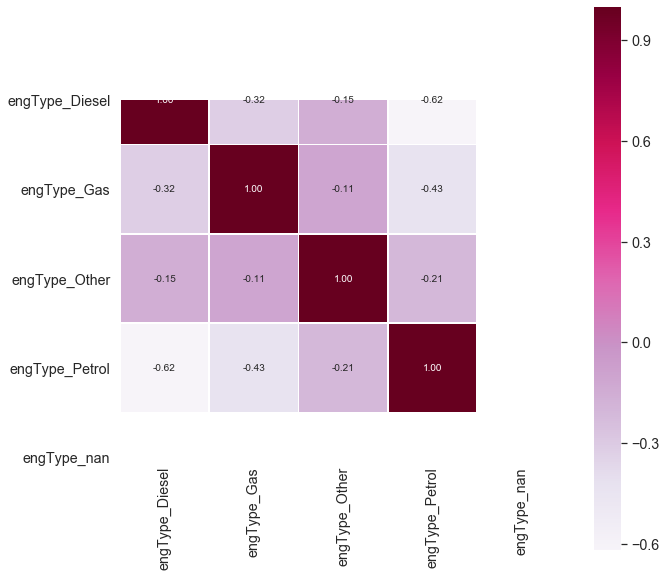

In [564]:
corr_engType= ohe_engType.corr()
plt.figure(figsize =(10, 10))
sns.heatmap(corr_engType, annot=True, fmt='.2f', cmap='PuRd', square=True, linewidth=0.5 )

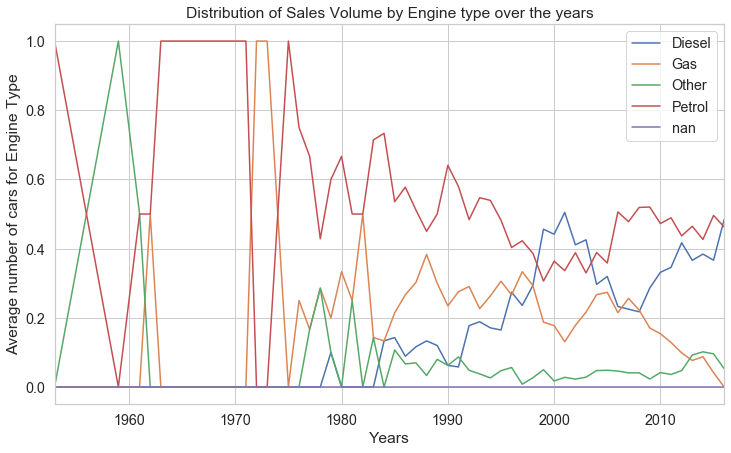

In [565]:
df_car.groupby('year')['engType_Diesel'].mean().plot(kind='line', figsize=(12, 7))
df_car.groupby('year')['engType_Gas'].mean().plot(kind='line', figsize=(12, 7))
df_car.groupby('year')['engType_Other'].mean().plot(kind='line', figsize=(12, 7))
df_car.groupby('year')['engType_Petrol'].mean().plot(kind='line', figsize=(12, 7))
df_car.groupby('year')['engType_nan'].mean().plot(kind='line', figsize=(12, 7))
plt.xlabel('Years')
plt.ylabel('Average number of cars for Engine Type')
plt.title('Distribution of Sales Volume by Engine type over the years')
plt.legend(labels=('Diesel', 'Gas', 'Other', 'Petrol', 'nan'))

#### 4.6 Processing on registration column

In [199]:
df_car.groupby('registration').count()

,car,price,body,mileage,engV,engType,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan,df_decades,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van
registration,,,,,,,,,,,,,,,,,,,,
no,561,531,561,489,514,561,561,561,523,561,561,561,561,561,556,556,556,556,556,556
yes,8893,8187,8893,7483,7695,8893,8893,8893,8424,8893,8893,8893,8893,8893,8777,8777,8777,8777,8777,8777


In [200]:
df_car[df_car['registration'] == 'no']['car'].nunique()

32

In [201]:
df_car[df_car['registration'] == 'no']['year'].nunique()

28

There are 561 cars that have not been registered over a period of 28 years and belonging to 32 different car manufacturers.<Br>
The reason for not registering the cars is not clear - it could be that these cars are still with dealers or some of these are just sold & in the proecss of being registered at the time of data collection.

#### registration

#### Processing the 'mileage' column

In [31]:
df_car.mode(axis=0)

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan
0,Volkswagen,8500.0,sedan,0,2.0,Petrol,yes,2008,E-Class,front,1,0,0,0


In [32]:
df_car[df_car['mileage'] < 2]['mileage'].count() # There 605 rows with mileage value of either 1 or 2 

605

In [33]:
df_car[df_car['mileage'].isnull()]['mileage'].count() # No null values for mileage in original data

0

In [34]:
# Mask funcion will replace the value where condition is True with 'other' which has default value of NaN
df_car['mileage'].mask(df_car['mileage'] < 2, inplace=True)

In [36]:
df_car[df_car['mileage'].isna()]['mileage'].count()

0

In [37]:
df_car[df_car['mileage'] >= 2]['mileage'].count() # There 605 rows with mileage value of either 1 or 2 

8849

In [38]:
8869+605

9474

In [39]:
quartiles = [0, 0.05, 0.25, 0.5, 0.75, 0.95, 1]
for i in quartiles:
    print(df_car['mileage'].quantile(i)) #mode(axis=0)

2.0
24.0
83.0
135.0
200.0
312.0
999.0


In [40]:
df_car[df_car['mileage'] < 24]['mileage']

16      2.0 
22      2.0 
39      19.0
41      12.0
44      6.0 
       ...  
9522    11.0
9523    7.0 
9529    3.0 
9540    11.0
9542    20.0
Name: mileage, Length: 436, dtype: float64

In [41]:
df_car[df_car['mileage'] > 312]['mileage']

62      320.0
102     450.0
225     340.0
254     320.0
262     345.0
        ...  
9439    500.0
9440    450.0
9512    382.0
9530    370.0
9532    427.0
Name: mileage, Length: 441, dtype: float64

In [42]:
def Address_mileage_outliers(x):
    if ((x<24) or (x>312)):
        return np.nan
    else:
        return x
    
df_car['mileage']=df_car['mileage'].apply(Address_mileage_outliers)    

In [43]:
quartiles = [0, 0.05, 0.25, 0.5, 0.75, 0.95, 1]
for i in quartiles:
    print(df_car['mileage'].quantile(i)) #mode(axis=0)

24.0
40.0
88.0
135.0
191.0
274.0
312.0


In [764]:
def identify_outliers(x):
    fifth_percentile = x.quartile(0.05)
    ninety_fifth_percentile = x.quartile(0.95)
    values_below_5th = x<fifth_percentile for i,v in enumerate(x)

200.0    170
150.0    130
250.0    128
130.0    125
160.0    123
        ... 
840.0    1  
404.0    1  
361.0    1  
523.0    1  
570.0    1  
Name: mileage, Length: 440, dtype: int64

#### 4.7 Analysing/Processing 'model' column

In [44]:
df_car['model'].value_counts()

E-Class       192
A6            172
Camry         132
Vito ïàññ.    128
Lanos         126
             ... 
RX 450        1  
Ignis         1  
4Runner       1  
LandMark      1  
3741          1  
Name: model, Length: 880, dtype: int64

Text(0.5, 1.0, 'Top Ten Car Models')

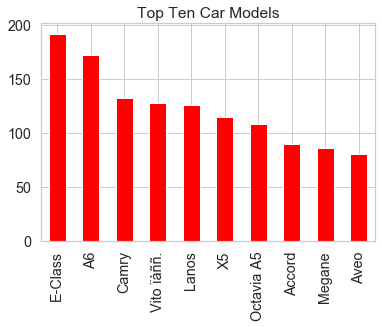

In [45]:
df_car['model'].value_counts().sort_values(ascending=False)[:10].plot.bar(cmap='prism')
plt.title('Top Ten Car Models')

In [46]:
df_car['model'].unique()[::8]

array(['Kuga', '316', 'A6', 'Galant', 'Camry', 'Vectra C', 'Passat B7',
       '6', 'Octavia A7', 'Ceed', 'Sorento', 'Santa FE', 'Trafic ïàññ.',
       'Rav 4', 'LX 470', '323', 'IX35', 'Rio', 'Teana', 'Tribeca',
       'FJ Cruiser', '21099', 'LT ïàññ.', 'Golf Variant', 'Armada',
       'Venza', 'Pilot', 'TT', 'Up', 'Avalon', '5', 'X3', 'Scenic',
       'Vectra B', 'Sprinter ãðóç.', 'QX70', 'Vectra A', 'Model X',
       'Flying Spur', 'TIIDA', 'Tundra', 'S 65 AMG', 'SX4', 'GLS 63',
       'L 200', 'GL 500', '645', '330', 'S8', 'RX 400', 'B 200', '2110',
       'H2', 'Sprinter 313 ïàññ.', 'Evanda', 'ix55 (Veracruz)', 'Savana',
       'Kadett', 'XC90', 'Eastar', 'Pajero', 'Ïðèîðà', 'Q3', '605',
       'Malibu', 'CLA-Class', 'Avenger', 'Jumpy ãðóç.', '607',
       'Grand Marquis', '106', 'LS 430', '406', 'ES 330', 'L 400 ïàññ.',
       'Jimny', 'S60', 'Vanette ïàññ.', 'Sprinter 312 ãðóç.', 'Felicia',
       'Express ïàññ.', 'GLK 220', '3303', 'Prisma', 'Prius', '156',
       'Grand Voyage

- It is observerd that model names contain some foreign characters e.g. Ïðèîðà, LT ïàññ, Sprinter ãðóç. It could be because data from multiple countries has been consolidated. The data may have to be cleaned to use the right character code. We have used 'latin-1' while loading the data. 
- We need to identify the which character code has been used and then decode these values to one of stanard formats.
- Below package may be helpful
- import chardet
- with open('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', 'rb') as rawdata:
- result = chardet.detect(rawdata.read(1000))

#### Price Outlier

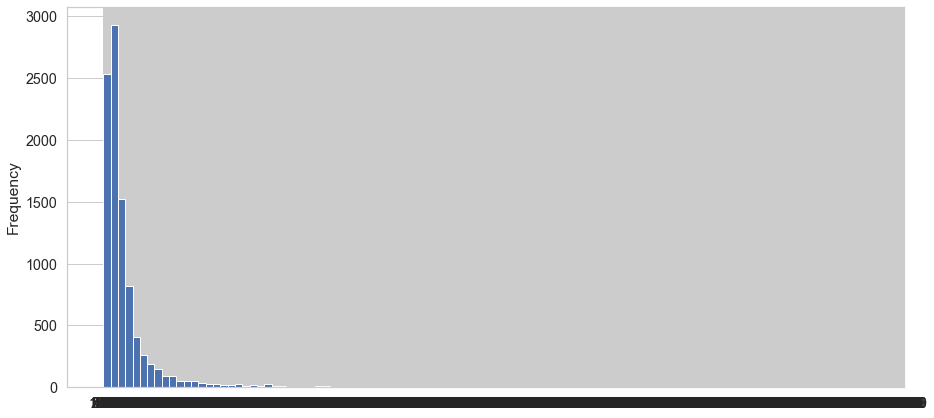

In [47]:
df_car['price'].plot.hist(bins=100, xticks=np.arange(0, 600000, 600), figsize=(15, 7))

- It is noticed that the car prices are largely concetrated closer to left. There are very few values to the right which are far away from normal
- The pre-processing pandas profiling report shows 1400 as value at *5 percentile* and 51000 as value at *95 percentile*
- It can be reasonably concluded that the price values less than 1400 and more than 51000 are outliers 
- Since other columns on these rows may have useful information, we will not delete these rows, rather replace the price values with NaN

In [48]:
df_car[df_car['price'].isna()].shape[0]

0

In [49]:
df_car[df_car['price']==0]

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan


In [50]:
# Car prices less than 5th percentile of 1400. These are potential outliers, we will delete these rows
df_car[df_car['price']<1400]['price'].count()

210

In [51]:
# Car prices more than 95th percentile of 51000. These are potential outliers, we will delete these rows
df_car[df_car['price']>51000].count().shape[0]   

14

In [52]:
def Address_price_outliers(x):
    if ((x<1400) or (x>51000)):
        return np.nan
    else:
        return x
    
df_car['price']=df_car['price'].apply(Address_price_outliers)    

In [53]:
df_car[df_car['price'].isna()].shape

(736, 14)

In [54]:
df_car.shape

(9454, 14)

### Top 10 car models

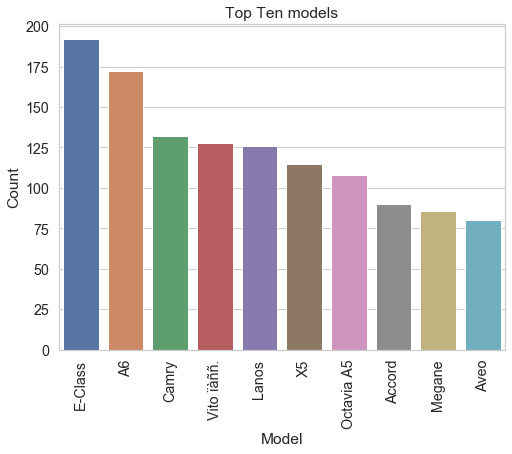

In [223]:
from collections import Counter
model_count = Counter(df_car['model'].dropna().tolist()).most_common(10)
price_idx = [price[0] for price in model_count]
price_val = [price[1] for price in model_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = price_idx,y=price_val ,ax =ax)
plt.title('Top Ten models')
plt.xlabel('Model')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

### 5. Bivariate and Multivariate Analysis

In [56]:
sns.set_style("whitegrid")

In [57]:
df_e_class = df_car[df_car['model'] == 'E-Class']
df_e_class.shape

(192, 14)

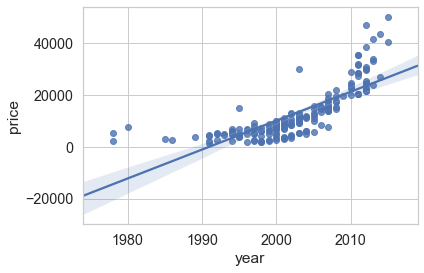

In [58]:
ax = sns.regplot(x="year", y="price", data=df_e_class) #, hue='engType')

- There is positive correlation between price & year, meaning the price is increasing as we move to later years 
- It may be noted that there are no points below zero. Seaborn has extrapoplated the line so it creates a view as if negaive price values are present.

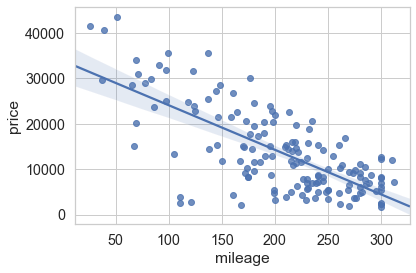

In [59]:
ax = sns.regplot(x="mileage", y="price", data=df_e_class) #, hue='drive')

 - This is interesting, *the price for E-class seems to be dropping as the mileage increases.*
 - **Higher the mileage, cheaper the car**

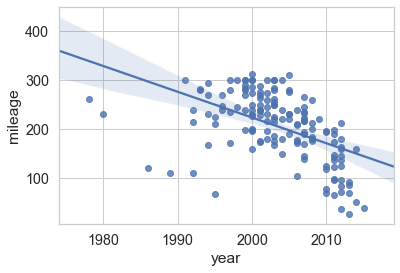

In [60]:
ax = sns.regplot(x="year", y="mileage", data=df_e_class) #, hue='engType')

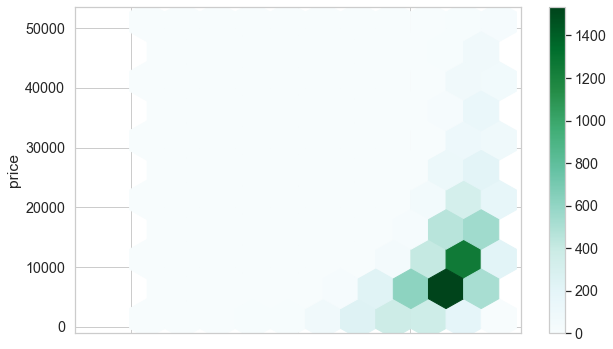

In [61]:
df_car.plot(kind='hexbin', x="year", y="price", figsize=(10, 6), legend=True, 
                xticks=np.arange(1940, 2030, 10), gridsize=10) #, data=df_e_class) #, hue='drive')
plt.xlabel('Year')
plt.show()

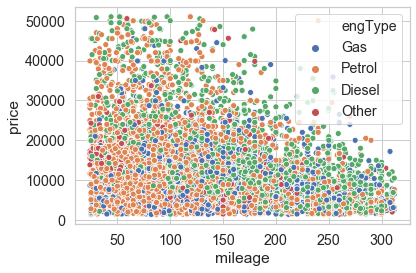

In [551]:
ax = sns.scatterplot(x="mileage", y="price", data=df_car, hue='engType')

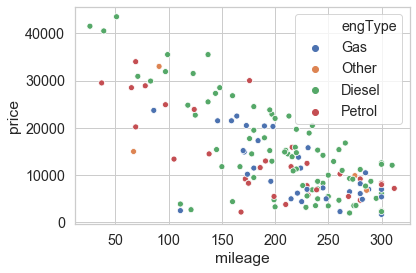

In [549]:
ax = sns.scatterplot(x="mileage", y="price", data=df_e_class, hue='engType')

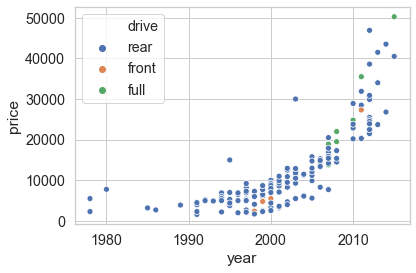

In [64]:
ax = sns.scatterplot(x="year", y="price", data=df_e_class, hue='drive')
#plt. figsize=(15, 7)

Text(0.5, 0, 'Engine Type')

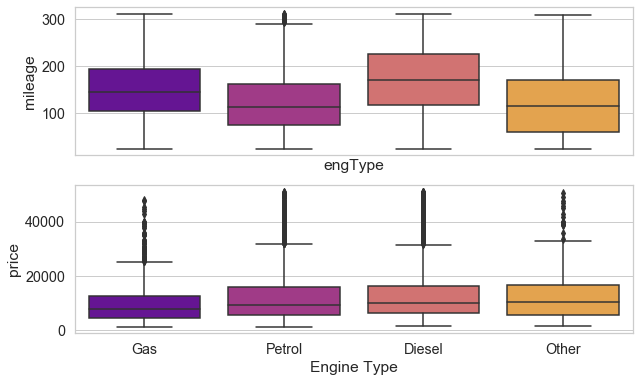

In [172]:
f,axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

sns.boxplot(data=df_car, y="price", x="engType", ax=axes[1], palette='plasma')
sns.boxplot(data=df_car, y="mileage", x="engType", ax=axes[0], palette='plasma')
plt.xlabel('Engine Type')

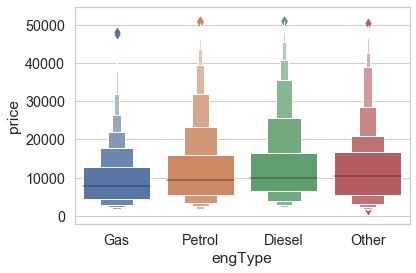

In [68]:
ax = sns.boxenplot(x="engType", y="price", data=df_car)
#plt. figsize=(15, 7)

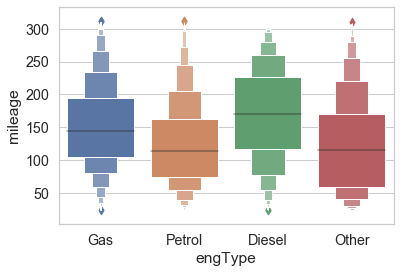

In [67]:
ax = sns.boxenplot(x="engType", y="mileage", data=df_car)
#plt. figsize=(15, 7)

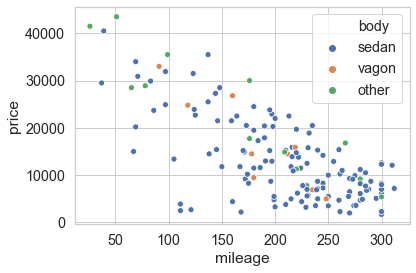

In [69]:
ax = sns.scatterplot(x="mileage", y="price", data=df_e_class, hue='body')

## Year wise Sales data

Text(0.5, 1.0, 'Overall Car sales volume by year')

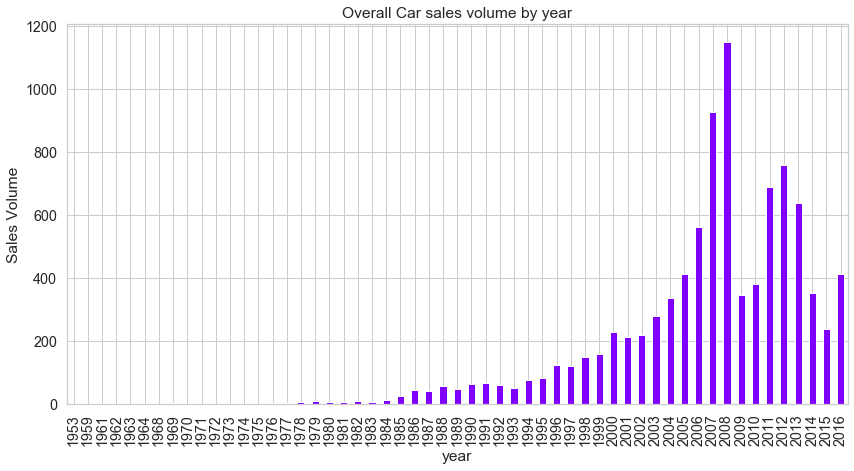

In [594]:
df_car.groupby('year').size().plot.bar(figsize=(14,7), colormap='rainbow')
plt.ylabel('Sales Volume')
plt.title('Overall Car sales volume by year')

As can be seen, the data set has car sales numbers from 1953 to 2016. 
It is noticed that, upto year 1999 the sales volume are very low. We may have to analyse data post year 2000 and the data prior to that separately.

Text(0.5, 1.0, 'Overall Car sales volume by year')

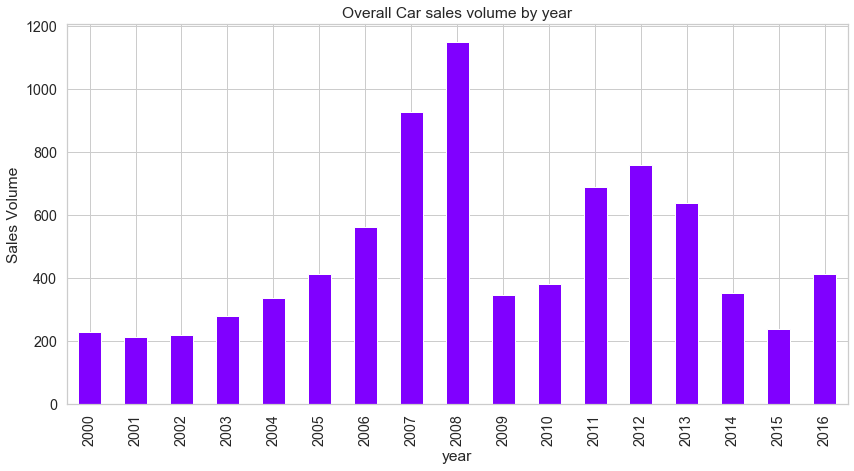

In [541]:
df_car[df_car['year'] >= 2000].groupby('year').size().plot.bar(figsize=(14,7), colormap='rainbow')
plt.ylabel('Sales Volume')
plt.title('Overall Car sales volume by year')

It can be observerd that the sales have steadily increased from year 2002 till 2008. 
There is a sudden and big drop in sales in year 2009 which may be attributed to the global recession owing to sub prime crisis.
Again, the sales are seen increasing very steadily for the next few year until 2012. 
From 2012 till 2015, there is year on year dip in the sales volume.
This behavior confirm to the general understanding that **automobile industry is cyclical** in nature.

Text(0.5, 1.0, 'Overall Car sales volume by year')

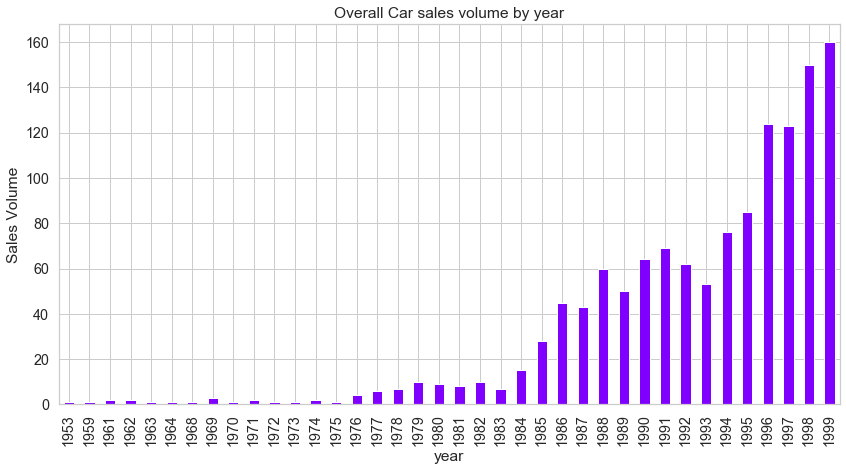

In [542]:
df_car[df_car['year'] < 2000].groupby('year').size().plot.bar(figsize=(14,7), colormap='rainbow')
plt.ylabel('Sales Volume')
plt.title('Overall Car sales volume by year')

- It may be noted that **maximum car sales in year 1999 is 160** which is also the **highest sale in any year till then.**
- Compared with this sales numbers **from year 2000 onwards are much higher - consistently more than 200 for every signle year**

In [71]:
bins = np.arange(1940, 2030, 10)
bins

array([1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])

In [72]:
df_car['df_decades'] = pd.cut(df_car['year'], bins=bins)

In [73]:
df_car['df_decades']

0       (2000, 2010]
1       (2010, 2020]
2       (2000, 2010]
3       (2010, 2020]
4       (2010, 2020]
            ...     
9571    (2010, 2020]
9572    (1980, 1990]
9573    (2000, 2010]
9574    (2000, 2010]
9575    (2000, 2010]
Name: df_decades, Length: 9454, dtype: category
Categories (8, interval[int64]): [(1940, 1950] < (1950, 1960] < (1960, 1970] < (1970, 1980] < (1980, 1990] < (1990, 2000] < (2000, 2010] < (2010, 2020]]

In [74]:
df_car['df_decades'].value_counts()

(2000, 2010]    4836
(2010, 2020]    3099
(1990, 2000]    1133
(1980, 1990]    330 
(1970, 1980]    43  
(1960, 1970]    11  
(1950, 1960]    2   
(1940, 1950]    0   
Name: df_decades, dtype: int64

Text(0.5, 1.0, 'Overall car sales across the entire time period')

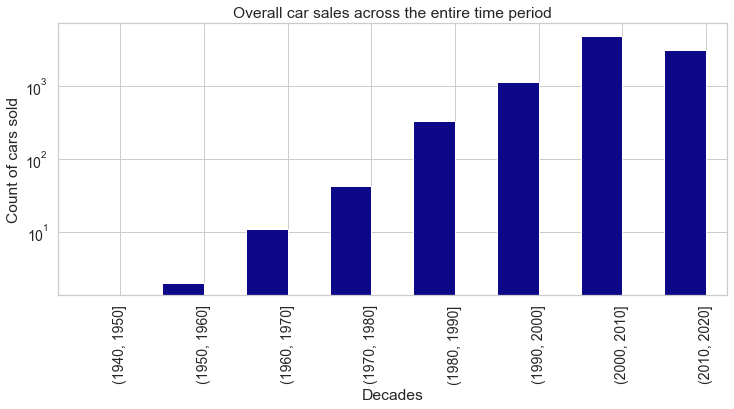

In [556]:
df_car['df_decades'].value_counts(sort=False).plot(kind='bar', logy=True, legend=False, colormap='plasma',
                                                   position=1, figsize=(12, 5), fontsize=14)
plt.ylabel('Count of cars sold')
plt.xlabel('Decades')
plt.title('Overall car sales across the entire time period')

#### Observations:
- Until 1970, the car sales were very low - closer to 10. Even upto 1980, it was less than 100.
- The car sales have consistently increased every decade until 2010, after which there is slight decline
- It may be noted that, since we summarizing the data over a very long duration (about 70 years), the variations over smaller duration are masked. e.g. one bar repersents 10 years, there will be ups & downs during this time which can not be noted here. For that, we will have to look at other more granular graphs.

In [76]:
df_car[df_car['price'].isna()].shape

(736, 15)

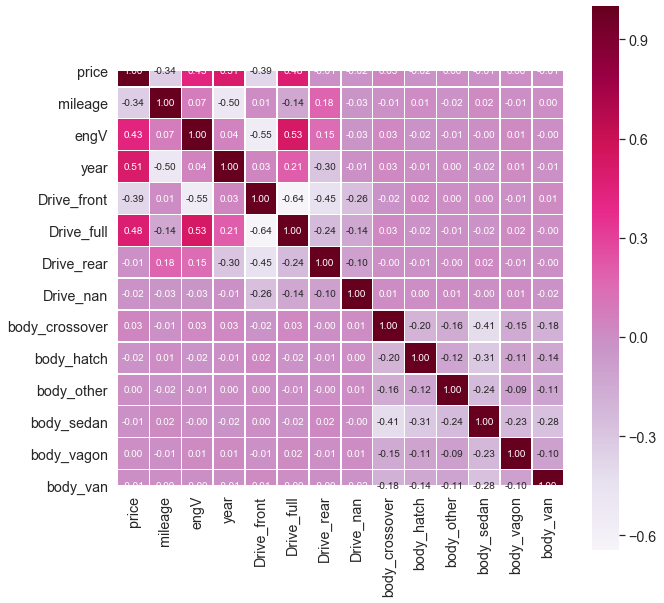

In [193]:
corr_mat = df_car.corr()
#print(corr_mat)
#ylables=['price', 'mileage', 'engV', 'year', 'Drive_front', 'Drive_full', 'Drive_rear', 'Drive_nan']
plt.figure(figsize =(10, 10))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='PuRd', square=True, linewidth=0.5 )
#ax.set_xticklabels(list(df['Q Code']), rotation=70)
#ax.set_yticklabels(ylables, minor=True, rotation=45)

### Observations:
 - 'Price' is positively correlated with 'year'
 - 'Price' is negatively correlated with 'mileage'
 - 'engV' does not have significant correlation with any other column

In [78]:
df_car.describe(include = 'all')

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan,df_decades
count,9454,8718.000000,9454,7972.000000,9023.000000,9454,9454,9454.000000,9454,8947,9454.000000,9454.000000,9454.000000,9454.000000,9454
unique,86,NaN,6,NaN,NaN,4,2,NaN,880,3,NaN,NaN,NaN,NaN,7
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front,NaN,NaN,NaN,NaN,"(2000, 2010]"
freq,927,NaN,3620,NaN,NaN,4336,8893,NaN,192,5170,NaN,NaN,NaN,NaN,4836
mean,NaN,12061.032353,NaN,143.527722,2.641028,NaN,NaN,2006.538820,NaN,NaN,0.546858,0.255765,0.143749,0.053628,NaN
std,NaN,9562.234325,NaN,70.104232,5.964868,NaN,NaN,7.030056,NaN,NaN,0.497826,0.436313,0.350853,0.225294,NaN
min,NaN,1400.000000,NaN,24.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,5500.000000,NaN,88.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,9200.000000,NaN,135.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,15300.000000,NaN,191.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN,1.000000,1.000000,0.000000,0.000000,NaN


In [79]:
df_car[~(df_car['mileage'] > 300)]

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan,df_decades
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full,0,1,0,0,"(2000, 2010]"
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear,0,0,1,0,"(2010, 2020]"
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear,0,0,1,0,"(2000, 2010]"
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front,1,0,0,0,"(2010, 2020]"
4,Mercedes-Benz,33000.0,vagon,91.0,NaN,Other,yes,2013,E-Class,NaN,0,0,0,1,"(2010, 2020]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140.0,2.0,Gas,yes,2011,Tucson,front,1,0,0,0,"(2010, 2020]"
9572,Volkswagen,2200.0,vagon,150.0,1.6,Petrol,yes,1986,Passat B2,front,1,0,0,0,"(1980, 1990]"
9573,Mercedes-Benz,18500.0,crossover,180.0,3.5,Petrol,yes,2008,ML 350,full,0,1,0,0,"(2000, 2010]"
9574,Lexus,16999.0,sedan,150.0,3.5,Gas,yes,2008,ES 350,front,1,0,0,0,"(2000, 2010]"


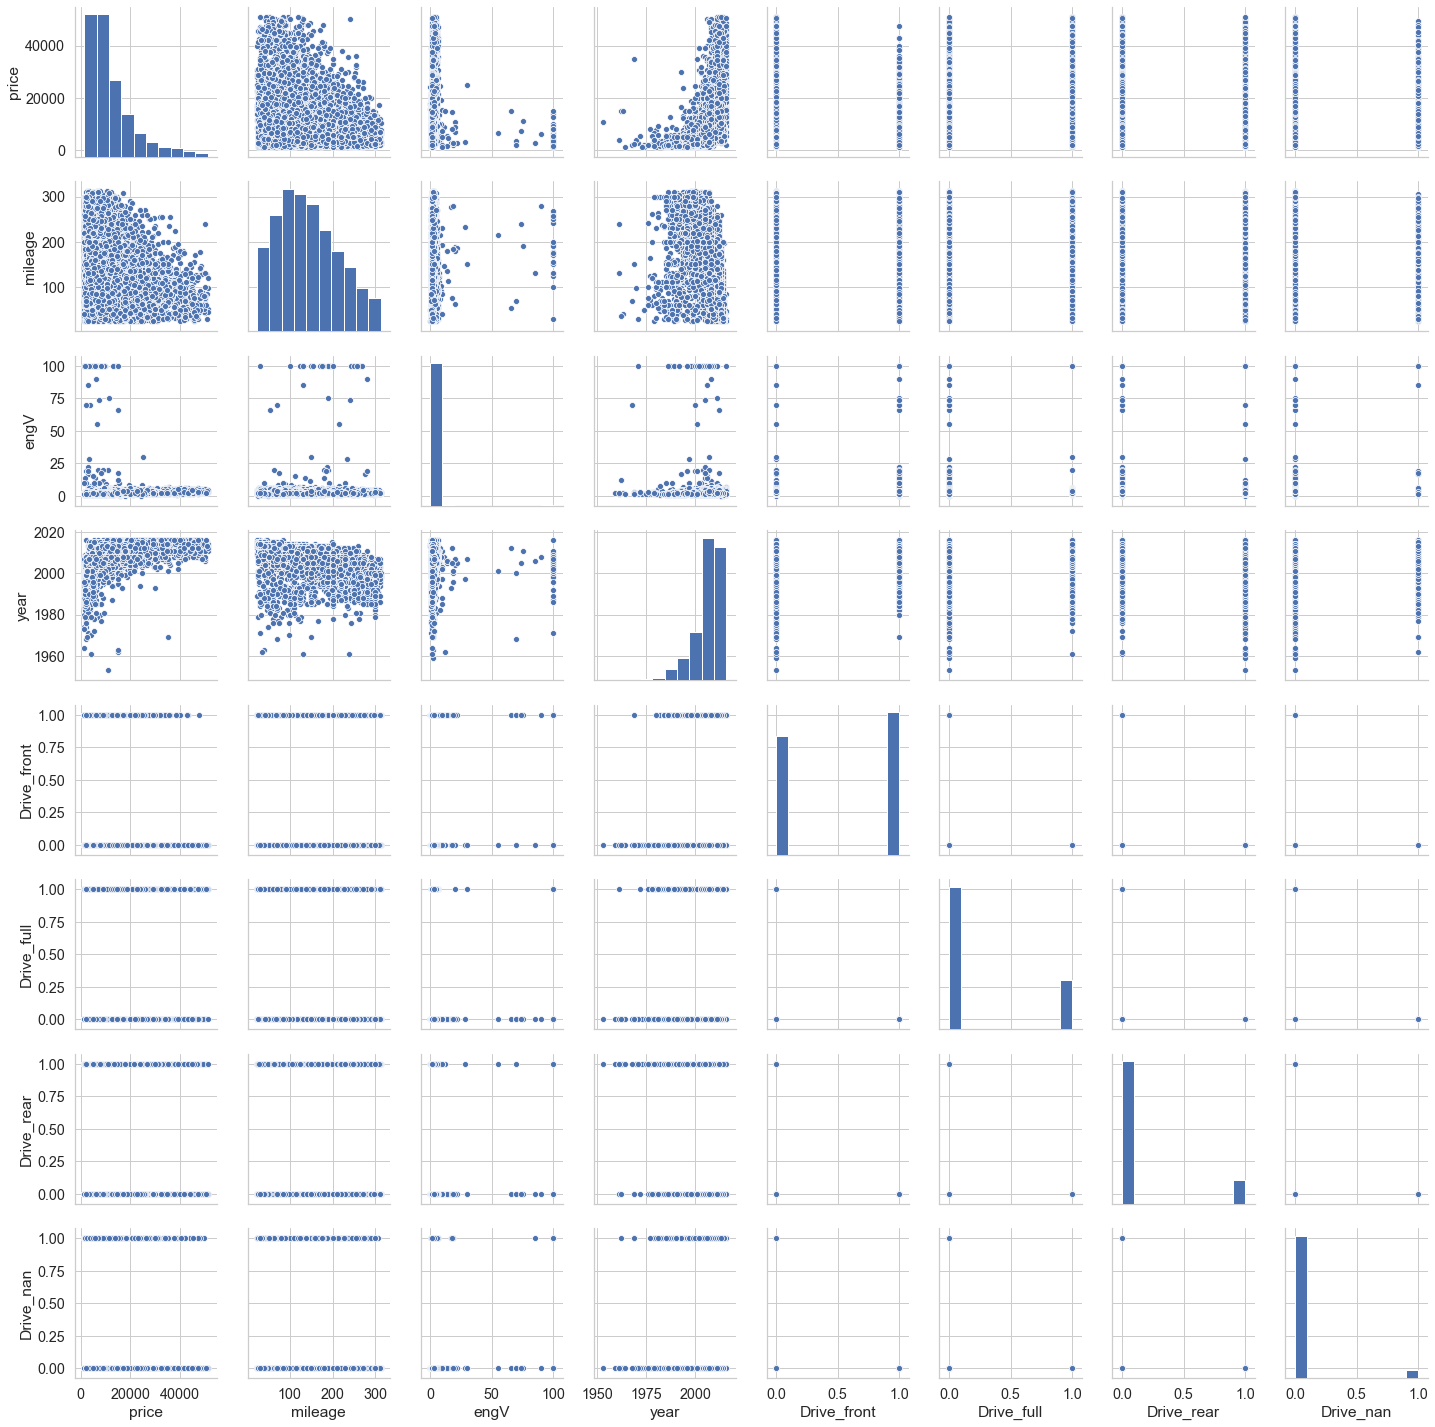

In [80]:
sns.pairplot(df_car)

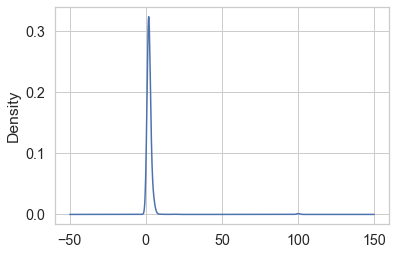

In [81]:
df_car['engV'].plot(kind='kde')

In [104]:
quartiles = [0, 0.05, 0.25, 0.5, 0.75, 0.95, 1]
for i in quartiles:
    print(df_car['engV'].quantile(i)) #mode(axis=0)

0.1
1.3
1.6
2.0
2.5
4.6
99.99


In [105]:
def Address_engV_outliers(x):
    if ((x<1.3) or (x>4.6)):
        return np.nan
    else:
        return x
    
df_car['engV']=df_car['engV'].apply(Address_engV_outliers)   

In [364]:
# less than 5th percentile and more than 95th pecentile -(df_car['engV']<1.3) or (df_car['engV']>4.6)
def outliers_engV():
    c = 0
    c += df_car[df_car['engV']<1.3].shape[0]
    c += df_car[df_car['engV']>4.6].shape[0]
    return c
print(outliers_engV())

636


In [106]:
df_by_EngType = df_car.groupby(df_car['engType'])

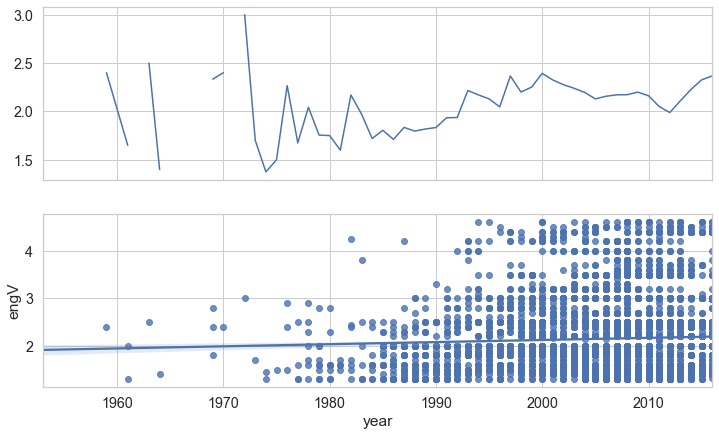

In [516]:
f,axes = plt.subplots(2, 1, figsize=(12, 7), sharex=True)
df_car.groupby('year')['engV'].mean().plot(kind='line', ax=axes[0], y='mean EngV')
ax = sns.regplot(x="year", y="engV", data=df_car, ax=axes[1])

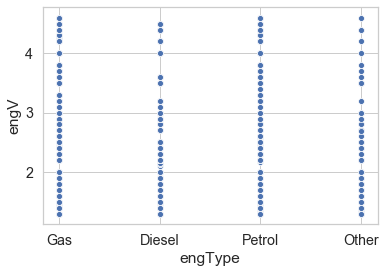

In [210]:
ax = sns.scatterplot(data=df_car, x='engType', y='engV')

 - Historically, many car model names have included the engine displacement. Examples include the 1923–1930 Cadillac Series 353 (powered by a 353-cubic-inch engine), the 1963–1968 BMW 1800 (a 1.8-litre engine) and the 2000–2006 Lexus LS430 (a 4.3-litre engine).

 - However, trends towards turbocharging and hybrid/electric drivetrains since 2010 have resulted in far fewer model names being based on the engine displacement.

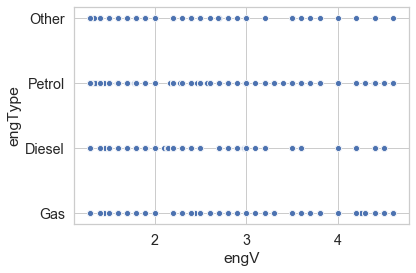

In [552]:
ax = sns.scatterplot(data=df_car, y='engType', x='engV')

In [204]:
df_car['engV'].value_counts().shape

(57,)

In [109]:
df_car.groupby('year')[['Drive_rear','Drive_front', 'Drive_full', 'Drive_nan']].agg(['sum', 'mean'])[0:-1:10]

Drive_rear           Drive_front           Drive_full            \
            sum      mean         sum      mean        sum      mean   
year                                                                   
1953  1          1.000000  0.0         0.000000  0.0        0.000000   
1972  0          0.000000  0.0         0.000000  1.0        1.000000   
1982  5          0.500000  2.0         0.200000  2.0        0.200000   
1992  16         0.258065  41.0        0.661290  4.0        0.064516   
2002  55         0.251142  114.0       0.520548  37.0       0.168950   
2012  56         0.073684  478.0       0.628947  177.0      0.232895   

     Drive_nan            
           sum      mean  
year                      
1953  0         0.000000  
1972  0         0.000000  
1982  1         0.100000  
1992  1         0.016129  
2002  13        0.059361  
2012  49        0.064474

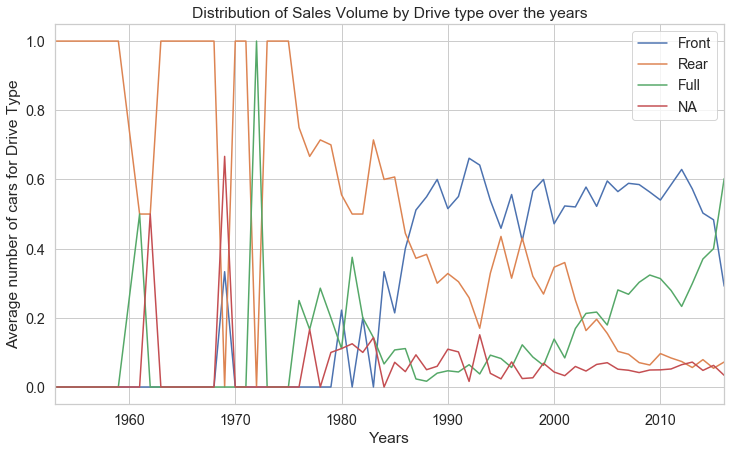

In [517]:
df_car.groupby('year')['Drive_front'].mean().plot(kind='line', figsize=(12, 7))
df_car.groupby('year')['Drive_rear'].mean().plot(kind='line', figsize=(12, 7))
df_car.groupby('year')['Drive_full'].mean().plot(kind='line', figsize=(12, 7))
df_car.groupby('year')['Drive_nan'].mean().plot(kind='line', figsize=(12, 7))
plt.xlabel('Years')
plt.ylabel('Average number of cars for Drive Type')
plt.title('Distribution of Sales Volume by Drive type over the years')
plt.legend(labels=('Front', 'Rear', 'Full', 'NA'))

### - Obserations:
#### Period from 1950 to 1975 (Rear drive dominated)
- Rear drive cars had a dominating share - for large part during this period, all cars belong to rear drive category
- Full drive cars came in around 1960s 
    - Reached about 50% share level but dropped back to zero within a few year.
    - Again gained popularity and touched 100% in early 80s but again could not sustain and dropped back to zero within a few years
- Front dribe cars - though they came in around 1970, did not gain much accepatnce during this period

#### Period from 1976 to 1995 (shift in drive preferences - Front drive becomes number one choice)
- Rear drive cars gradually declined from almost 100% share to less than 20% during this time
- Full dribe cars continued to see ups & downs but reamined larely btween 10% & 35%
- Front drive cars gained traction and reached above 60% share with consistent upward move during this period

#### Period after 1996 (Front drive reamins number one choice until Full drive takes over in the last few years)
- Rear drive cars continued the gradual decline and reached about 5% during this time
- Full dribe cars gradually gained popularity and went on to take number one spot displacing Front drive cars
- Front drive cars were the defacto number one choice throughout this period however Full drive cars over taken Front drive cars in the last few years 

<br>
- Note: There are about 5% to 10% cars for which the data is missing. So far, no logically convincing appoach to replace missing values could be identified

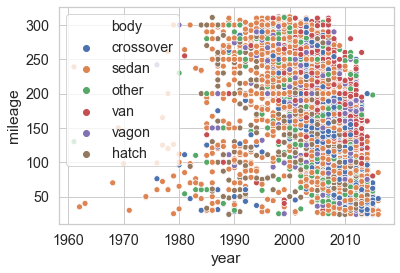

In [111]:
#df_car.groupby(['year'])['body']=='Sedan' #.body.sum() #. plot(kind='bar', x='year')
#df_car[df_car['body']=='Sedan'].count()
ax = sns.scatterplot(x="year", y="mileage", hue='body', data=df_car) #, dropna=True)

- Its difficult to infer anything from such a chart - too crowded

#### Processing for 'body' column
- 'body' being a categorical colulmn is posing some challenges in analyzing
- We will convert to numerical values by using LabelBinarizer from sklearn

In [113]:
from sklearn.preprocessing import LabelBinarizer

lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(df_car["body"])
pd_body = pd.DataFrame(lb_results, columns=lb_style.classes_.astype(str))    # .astype(str) is necessary to get proper string names

In [116]:
pd_body.sample(5)

,crossover,hatch,other,sedan,vagon,van
4183,0,0,0,0,1,0
1787,0,1,0,0,0,0
2467,0,0,0,1,0,0
4255,0,0,0,1,0,0
8940,1,0,0,0,0,0


In [117]:
df_car=df_car.join(pd_body)
df_car.sample(5)

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan,df_decades,crossover,hatch,other,sedan,vagon,van
2736,Honda,20999.0,sedan,74.0,2.4,Petrol,yes,2011,Accord,front,1,0,0,0,"(2010, 2020]",0.0,0.0,0.0,0.0,1.0,0.0
8029,UAZ,1750.0,crossover,NaN,2.4,Gas,yes,1982,469Á,full,0,1,0,0,"(1980, 1990]",0.0,0.0,0.0,1.0,0.0,0.0
4259,BMW,NaN,crossover,NaN,4.4,Petrol,yes,2016,X5 M,full,0,1,0,0,"(2010, 2020]",1.0,0.0,0.0,0.0,0.0,0.0
8801,Volvo,40300.0,crossover,NaN,2.0,Diesel,yes,2016,XC60,NaN,0,0,0,1,"(2010, 2020]",0.0,0.0,0.0,1.0,0.0,0.0
4353,Ford,17600.0,crossover,83.0,2.5,Gas,yes,2011,Kuga,full,0,1,0,0,"(2010, 2020]",0.0,0.0,0.0,1.0,0.0,0.0


In [118]:
df_car.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive', 'Drive_front', 'Drive_full', 'Drive_rear',
       'Drive_nan', 'df_decades', 'crossover', 'hatch', 'other', 'sedan',
       'vagon', 'van'],
      dtype='object')

In [122]:
df_car = df_car.rename(columns = 
              {
    "crossover":"body_crossover",
    "hatch":"body_hatch", 
    "other":"body_other",
    "sedan":"body_sedan",
    "vagon":"body_vagon",
    "van":"body_van"
              }
             ) 

In [123]:
df_car.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive', 'Drive_front', 'Drive_full', 'Drive_rear',
       'Drive_nan', 'df_decades', 'body_crossover', 'body_hatch', 'body_other',
       'body_sedan', 'body_vagon', 'body_van'],
      dtype='object')

In [165]:
df_car.groupby('year')[['body_crossover', 'body_hatch', 'body_other', 'body_sedan', 'body_vagon', 'body_van']].agg(['sum', 'mean'])[0:-1:10]

body_crossover           body_hatch           body_other            \
                sum      mean        sum      mean        sum      mean   
year                                                                      
1953  1.0            1.000000  0.0        0.000000  0.0        0.000000   
1972  1.0            1.000000  0.0        0.000000  0.0        0.000000   
1982  1.0            0.100000  2.0        0.200000  1.0        0.100000   
1992  16.0           0.262295  7.0        0.114754  4.0        0.065574   
2002  34.0           0.156682  27.0       0.124424  18.0       0.082949   
2012  167.0          0.222370  87.0       0.115846  67.0       0.089214   

     body_sedan           body_vagon           body_van            
            sum      mean        sum      mean      sum      mean  
year                                                               
1953  0.0        0.000000  0.0        0.000000  0.0      0.000000  
1972  0.0        0.000000  0.0        0.000000  0.0      0.000000  
1982  5.0        0.500000  1.0        0.100000  0.0      0.000000  
1992  26.0       0.426230  5.0        0.081967  3.0      0.049180  
2002  95.0       0.437788  15.0       0.069124  28.0     0.129032  
2012  295.0      0.392810  58.0       0.077230  77.0     0.102530

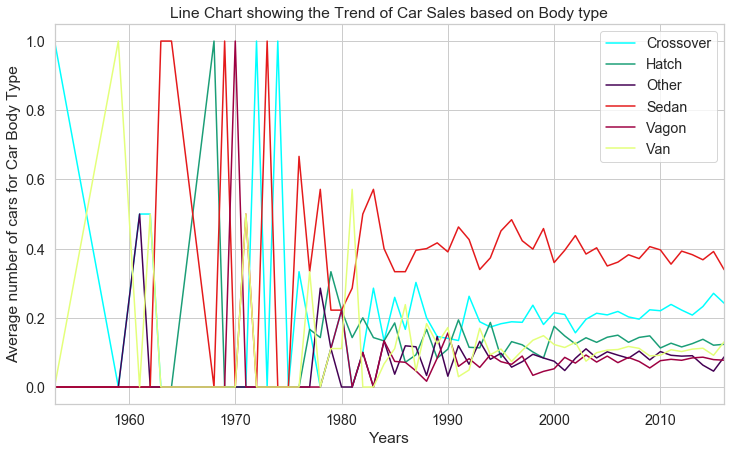

In [164]:
df_car.groupby('year')['body_crossover'].mean().plot(kind='line', figsize=(12, 7), colormap='cool', stacked=True)
df_car.groupby('year')['body_hatch'].mean().plot(kind='line', figsize=(12, 7), colormap='Dark2', stacked=True)
df_car.groupby('year')['body_other'].mean().plot(kind='line', figsize=(12, 7), colormap='viridis', stacked=True)
df_car.groupby('year')['body_sedan'].mean().plot(kind='line', figsize=(12, 7), colormap='Set1', stacked=True)
df_car.groupby('year')['body_vagon'].mean().plot(kind='line', figsize=(12, 7), colormap='Spectral', stacked=True)
df_car.groupby('year')['body_van'].mean().plot(kind='line', figsize=(12, 7), colormap='Wistia', stacked=True)
plt.xlabel('Years')
plt.ylabel('Average number of cars for Car Body Type')
plt.title('Line Chart showing the Trend of Car Sales based on Body type')
plt.legend(labels=('Crossover', 'Hatch', 'Other', 'Sedan', 'Vagon', 'Van'))

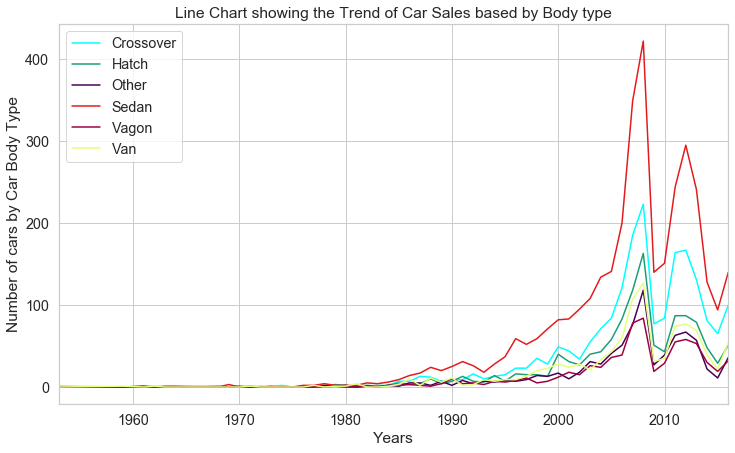

In [184]:
df_car.groupby('year')['body_crossover'].sum().plot(kind='line', figsize=(12, 7), colormap='cool', stacked=True)
df_car.groupby('year')['body_hatch'].sum().plot(kind='line', figsize=(12, 7), colormap='Dark2', stacked=True)
df_car.groupby('year')['body_other'].sum().plot(kind='line', figsize=(12, 7), colormap='viridis', stacked=True)
df_car.groupby('year')['body_sedan'].sum().plot(kind='line', figsize=(12, 7), colormap='Set1', stacked=True)
df_car.groupby('year')['body_vagon'].sum().plot(kind='line', figsize=(12, 7), colormap='Spectral', stacked=True)
df_car.groupby('year')['body_van'].sum().plot(kind='line', figsize=(12, 7), colormap='Wistia', stacked=True)
plt.xlabel('Years')
plt.ylabel('Number of cars by Car Body Type')
plt.title('Line Chart showing the Trend of Car Sales based by Body type')
plt.legend(labels=('Crossover', 'Hatch', 'Other', 'Sedan', 'Vagon', 'Van'))

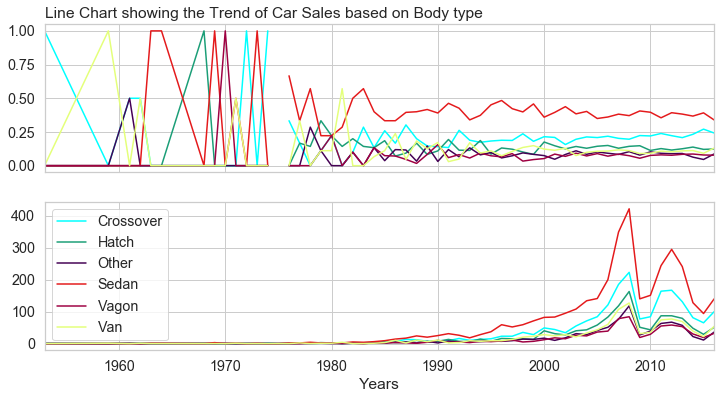

In [318]:
f,axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

df_car.groupby('year')['body_crossover'].mean().plot(kind='line', colormap='cool', ax=axes[0])
df_car.groupby('year')['body_hatch'].mean().plot(kind='line', colormap='Dark2', ax=axes[0])
df_car.groupby('year')['body_other'].mean().plot(kind='line', colormap='viridis', ax=axes[0])
df_car.groupby('year')['body_sedan'].mean().plot(kind='line', colormap='Set1', ax=axes[0])
df_car.groupby('year')['body_vagon'].mean().plot(kind='line', colormap='Spectral', ax=axes[0])
df_car.groupby('year')['body_van'].mean().plot(kind='line', colormap='Wistia', ax=axes[0])

df_car.groupby('year')['body_crossover'].sum().plot(kind='line', colormap='cool', ax=axes[1])
df_car.groupby('year')['body_hatch'].sum().plot(kind='line', colormap='Dark2', ax=axes[1])
df_car.groupby('year')['body_other'].sum().plot(kind='line', colormap='viridis', ax=axes[1])
df_car.groupby('year')['body_sedan'].sum().plot(kind='line', colormap='Set1', ax=axes[1])
df_car.groupby('year')['body_vagon'].sum().plot(kind='line', colormap='Spectral', ax=axes[1])
df_car.groupby('year')['body_van'].sum().plot(kind='line', colormap='Wistia', ax=axes[1])

plt.xlabel('Years')
#yticks = plt.setp() #axes[0].ylable())
#plt.ylabel([axes[0], axes[1]],['Average', 'Sum'])
#plt.ylabel(['Sum', 'Average'])
plt.title('Line Chart showing the Trend of Car Sales based on Body type', loc='left', position=(0, 2.2))
plt.legend(['Crossover', 'Hatch', 'Other', 'Sedan', 'Vagon', 'Van'], loc=0)

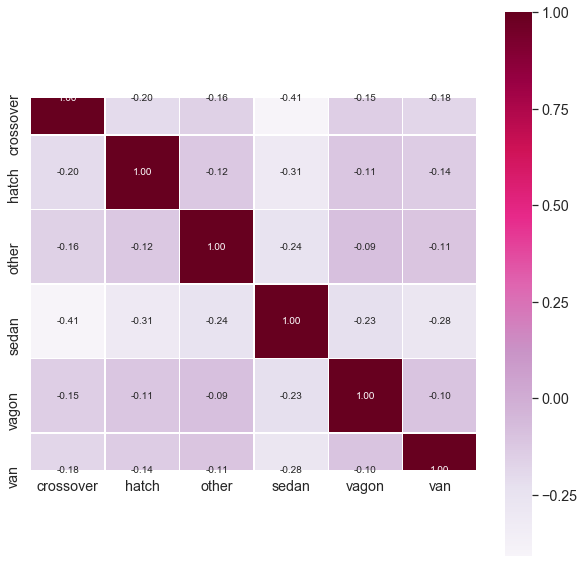

In [196]:
corr_body= pd_body.corr()
plt.figure(figsize =(10, 10))
sns.heatmap(corr_body, annot=True, fmt='.2f', cmap='PuRd', square=True, linewidth=0.5 )

In [11]:
# To be on safe side, let's create & keep a copy of the dataframe 
df_car_copy = df_car.copy(deep=True)
# and then proceed with joining the ecncoded columns to our dataframe
df_car = df_car.join(ohe_drive)
df_car

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,0,1,0,0
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,0,0,1,0
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,0,0,1,0
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,1,0,0,0
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front,1,0,0,0
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front,1,0,0,0
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full,0,1,0,0
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front,1,0,0,0


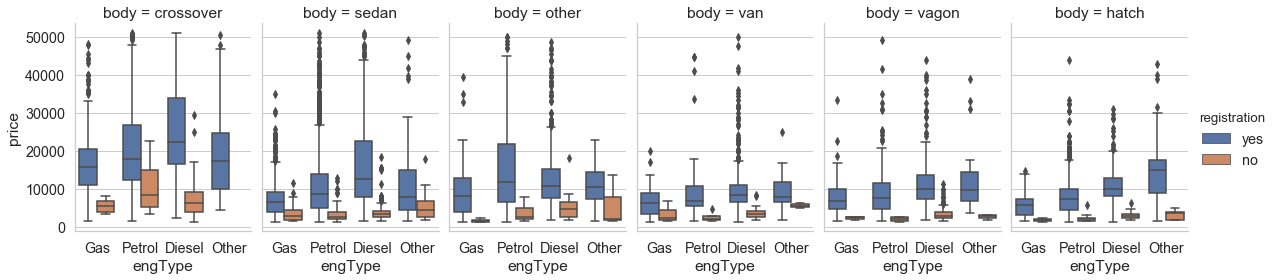

In [120]:
g = sns.catplot(x="engType", y="price", 
                 hue="registration", col="body",
                 data=df_car, kind="box",
                 height=4, aspect=.7);


### 6.  Analysis based on questions

#### Some questions:
   * What are the top 10 & bottom 10 popular cars (based on maximum & minimum sales volume)?<br> 
   * What are the top 10 & bottom 10 costly cars (based on maximum & minimum price )?<br>
   * How is the sales trend over the years? Also, trend for car prices (min, mean & max over the years

#### TOP 10 by Sales Volume

In [566]:
df_car.groupby('model').count().sort_values(by='car', ascending=False)[:10].index

Index(['E-Class', 'A6', 'Camry', 'Vito ïàññ.', 'Lanos', 'X5', 'Octavia A5',
       'Accord', 'Megane', 'Aveo'],
      dtype='object', name='model')

In [567]:
df_car_top10 = df_car[df_car['model'].isin(df_car.groupby('model').count().sort_values(by='car', ascending=False)[:10].index)]

In [568]:
df_car_bottom10 = df_car[df_car['model'].isin(df_car.groupby('model').count().sort_values(by='car', ascending=True)[:10].index)]

In [572]:
df_car_top10.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan,df_decades,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Diesel,engType_Gas,engType_Other,engType_Petrol,engType_nan
count,1229,1189.000000,1229,1079.000000,1156.000000,1229,1229,1229.000000,1229,1167,1229.000000,1229.000000,1229.000000,1229.000000,1229,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.0
unique,10,NaN,6,NaN,NaN,4,2,NaN,10,3,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mercedes-Benz,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class,front,NaN,NaN,NaN,NaN,"(2000, 2010]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,320,NaN,711,NaN,NaN,494,1103,NaN,192,748,NaN,NaN,NaN,NaN,741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11668.850768,NaN,165.341057,2.214170,NaN,NaN,2006.467860,NaN,NaN,0.608625,0.145647,0.195281,0.050448,NaN,0.237860,0.120165,0.075720,0.387654,0.074897,0.103704,0.401953,0.197722,0.035801,0.364524,0.0
std,NaN,8254.848792,NaN,68.504719,0.599616,NaN,NaN,5.363344,NaN,NaN,0.488257,0.352895,0.396578,0.218956,NaN,0.425948,0.325288,0.264659,0.487416,0.263334,0.305001,0.490492,0.398443,0.185870,0.481492,0.0
min,NaN,1550.000000,NaN,24.000000,1.300000,NaN,NaN,1978.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,NaN,5444.000000,NaN,112.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,NaN,9999.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,NaN,14500.000000,NaN,215.000000,2.500000,NaN,NaN,2011.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0


In [574]:
711/1229  # Preference for Sedan

0.5785191212367778

In [575]:
494/1229  # Preference for Diesel

0.4019528071602929

In [576]:
748/1167 # Preference for Front drive

0.6409597257926307

In [577]:
df_car_bottom10.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan,df_decades,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Diesel,engType_Gas,engType_Other,engType_Petrol,engType_nan
count,10,10.000000,10,9.000000,9.000000,10,10,10.000000,10,8,10.000000,10.000000,10.000000,10.000000,10,9.000000,9.000000,9.0,9.000000,9.000000,9.0,10.000000,10.000000,10.0,10.000000,10.0
unique,10,NaN,5,NaN,NaN,3,1,NaN,10,3,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Chery,NaN,hatch,NaN,NaN,Petrol,yes,NaN,1 Series,front,NaN,NaN,NaN,NaN,"(2000, 2010]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,2,NaN,NaN,6,10,NaN,1,4,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7509.800000,NaN,131.000000,1.964444,NaN,NaN,2003.200000,NaN,NaN,0.400000,0.100000,0.300000,0.200000,NaN,0.111111,0.444444,0.0,0.333333,0.111111,0.0,0.200000,0.200000,0.0,0.600000,0.0
std,NaN,7058.623108,NaN,62.038295,0.480497,NaN,NaN,11.360751,NaN,NaN,0.516398,0.316228,0.483046,0.421637,NaN,0.333333,0.527046,0.0,0.500000,0.333333,0.0,0.421637,0.421637,0.0,0.516398,0.0
min,NaN,2900.000000,NaN,55.000000,1.300000,NaN,NaN,1979.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
25%,NaN,4025.000000,NaN,80.000000,1.700000,NaN,NaN,2003.250000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
50%,NaN,4550.000000,NaN,140.000000,2.000000,NaN,NaN,2007.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0
75%,NaN,6474.250000,NaN,160.000000,2.000000,NaN,NaN,2010.250000,NaN,NaN,1.000000,0.000000,0.750000,0.000000,NaN,0.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0


In [585]:
print("hatch: ", 2/10*100,"%", "\nPetrol: ", 6/10*100,"%", "\nFront", 4/8*100,"%") 

hatch:  20.0 % 
Petrol:  60.0 % 
Front 50.0 %


In [486]:
df_car[~(df_car['price'].isna())].model.isin(df_car.groupby('model').count().sort_values(by='price', ascending=True)[:10].index)

0       False
1       False
2       False
3       False
4       False
        ...  
9571    False
9572    False
9573    False
9574    False
9575    False
Name: model, Length: 8718, dtype: bool

In [487]:
df_car_no_na_price = df_car[~(df_car['price'].isna())]
df_car_no_na_price

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan,df_decades,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full,0,1,0,0,"(2000, 2010]",1.0,0.0,0.0,0.0,0.0,0.0
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear,0,0,1,0,"(2010, 2020]",0.0,0.0,0.0,1.0,0.0,0.0
2,Mercedes-Benz,35000.0,other,135.0,NaN,Petrol,yes,2008,CL 550,rear,0,0,1,0,"(2000, 2010]",0.0,0.0,1.0,0.0,0.0,0.0
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front,1,0,0,0,"(2010, 2020]",0.0,0.0,0.0,0.0,0.0,1.0
4,Mercedes-Benz,33000.0,vagon,91.0,NaN,Other,yes,2013,E-Class,NaN,0,0,0,1,"(2010, 2020]",0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140.0,2.0,Gas,yes,2011,Tucson,front,1,0,0,0,"(2010, 2020]",NaN,NaN,NaN,NaN,NaN,NaN
9572,Volkswagen,2200.0,vagon,150.0,1.6,Petrol,yes,1986,Passat B2,front,1,0,0,0,"(1980, 1990]",NaN,NaN,NaN,NaN,NaN,NaN
9573,Mercedes-Benz,18500.0,crossover,180.0,3.5,Petrol,yes,2008,ML 350,full,0,1,0,0,"(2000, 2010]",NaN,NaN,NaN,NaN,NaN,NaN
9574,Lexus,16999.0,sedan,150.0,3.5,Gas,yes,2008,ES 350,front,1,0,0,0,"(2000, 2010]",NaN,NaN,NaN,NaN,NaN,NaN


In [488]:
df_car[df_car['price'].isna()].shape

(736, 21)

In [489]:
df_car.shape

(9454, 21)

In [490]:
8718+736

9454

In [491]:
df_car.groupby('model').count().sort_values(by='price', ascending=True, na_position='last')[:10].index

Index(['2715', 'RX 200', 'GT-R', 'Rapide', 'Rekord', 'GLS 63', 'GLS 500',
       'S 250', 'GLS 400', 'Gallardo'],
      dtype='object', name='model')

##### TOP 10 by price

In [492]:
df_car_no_na_price.groupby('model').count().sort_values(by='price', ascending=False)[:10].index

Index(['E-Class', 'A6', 'Camry', 'Vito ïàññ.', 'Lanos', 'Octavia A5', 'Accord',
       'Megane', 'X5', 'Aveo'],
      dtype='object', name='model')

In [493]:
df_car_top10_by_price = df_car_no_na_price[df_car_no_na_price['model'].isin(df_car_no_na_price.groupby('model').count().sort_values(by='price', ascending=False)[:10].index)]

In [521]:
df_car_top10_by_price.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan,df_decades,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van
count,1189,1189.000000,1189,1066.000000,1117.000000,1189,1189,1189.000000,1189,1128,1189.000000,1189.000000,1189.000000,1189.000000,1189,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
unique,10,NaN,6,NaN,NaN,4,2,NaN,10,3,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Mercedes-Benz,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class,front,NaN,NaN,NaN,NaN,"(2000, 2010]",NaN,NaN,NaN,NaN,NaN,NaN
freq,317,NaN,706,NaN,NaN,463,1069,NaN,189,745,NaN,NaN,NaN,NaN,741,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11668.850768,NaN,165.965291,2.210098,NaN,NaN,2006.262405,NaN,NaN,0.626577,0.122792,0.199327,0.051304,NaN,0.228936,0.124255,0.077447,0.390638,0.076596,0.102128
std,NaN,8254.848792,NaN,68.133807,0.601042,NaN,NaN,5.169690,NaN,NaN,0.483917,0.328337,0.399663,0.220709,NaN,0.420327,0.330013,0.267413,0.488101,0.266062,0.302945
min,NaN,1550.000000,NaN,24.000000,1.300000,NaN,NaN,1978.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,5444.000000,NaN,113.000000,1.600000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,9999.000000,NaN,160.500000,2.200000,NaN,NaN,2007.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,14500.000000,NaN,215.000000,2.500000,NaN,NaN,2010.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [522]:
706/1189 # 59% preference for Sedan Body

0.5937762825904122

In [523]:
463/1189 # 39% preference for Diesel Engine

0.3894028595458368

In [524]:
745/1189 # 63% preference for Front Drive

0.6265769554247267

In [586]:
print("Sedan: ", 706/1189*100,"%", "\nDiesel: ", 463/1189*100,"%", "\nFront", 745/1189*100,"%") 

Sedan:  59.37762825904122 % 
Diesel:  38.94028595458368 % 
Front 62.657695542472666 %


##### BOTTOM 10 by price

In [495]:
df_car_no_na_price.groupby('model').count().sort_values(by='price', ascending=True)[:10].index

Index(['1 Series', 'Ideal', 'IQ', 'Haval', 'HR-V', 'Ïðèîðà', 'H 200 ïàññ.',
       'H 200 ãðóç.', 'H 100 ïàññ.', 'Grand Marquis'],
      dtype='object', name='model')

In [496]:
df_car_bottom10_by_price = df_car_no_na_price[df_car_no_na_price['model'].isin(df_car_no_na_price.groupby('model').count().sort_values(by='price', ascending=True)[:10].index)]

In [526]:
df_car_bottom10_by_price.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan,df_decades,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van
count,10,10.000000,10,8.000000,8.000000,10,10,10.000000,10,7,10.000000,10.000000,10.000000,10.000000,10,10.000000,10.000000,10.0,10.000000,10.000000,10.000000
unique,8,NaN,5,NaN,NaN,4,1,NaN,10,3,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Hyundai,NaN,van,NaN,NaN,Petrol,yes,NaN,1 Series,rear,NaN,NaN,NaN,NaN,"(2000, 2010]",NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,3,NaN,NaN,5,10,NaN,1,4,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6682.700000,NaN,141.500000,2.412500,NaN,NaN,2004.300000,NaN,NaN,0.200000,0.100000,0.400000,0.300000,NaN,0.100000,0.400000,0.0,0.200000,0.100000,0.200000
std,NaN,3188.953017,NaN,68.774995,0.961305,NaN,NaN,5.034327,NaN,NaN,0.421637,0.316228,0.516398,0.483046,NaN,0.316228,0.516398,0.0,0.421637,0.316228,0.421637
min,NaN,2300.000000,NaN,32.000000,1.600000,NaN,NaN,1998.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,NaN,4325.000000,NaN,97.500000,1.900000,NaN,NaN,2000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,NaN,5664.000000,NaN,140.000000,2.250000,NaN,NaN,2004.500000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,NaN,9675.000000,NaN,191.250000,2.500000,NaN,NaN,2008.250000,NaN,NaN,0.000000,0.000000,1.000000,0.750000,NaN,0.000000,1.000000,0.0,0.000000,0.000000,0.000000


In [498]:
df_car_top10_by_price.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan,df_decades,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van
count,1189,1189.000000,1189,1066.000000,1117.000000,1189,1189,1189.000000,1189,1128,1189.000000,1189.000000,1189.000000,1189.000000,1189,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
unique,10,NaN,6,NaN,NaN,4,2,NaN,10,3,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Mercedes-Benz,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class,front,NaN,NaN,NaN,NaN,"(2000, 2010]",NaN,NaN,NaN,NaN,NaN,NaN
freq,317,NaN,706,NaN,NaN,463,1069,NaN,189,745,NaN,NaN,NaN,NaN,741,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11668.850768,NaN,165.965291,2.210098,NaN,NaN,2006.262405,NaN,NaN,0.626577,0.122792,0.199327,0.051304,NaN,0.228936,0.124255,0.077447,0.390638,0.076596,0.102128
std,NaN,8254.848792,NaN,68.133807,0.601042,NaN,NaN,5.169690,NaN,NaN,0.483917,0.328337,0.399663,0.220709,NaN,0.420327,0.330013,0.267413,0.488101,0.266062,0.302945
min,NaN,1550.000000,NaN,24.000000,1.300000,NaN,NaN,1978.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,5444.000000,NaN,113.000000,1.600000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,9999.000000,NaN,160.500000,2.200000,NaN,NaN,2007.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,14500.000000,NaN,215.000000,2.500000,NaN,NaN,2010.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [499]:
df_car_bottom10_by_price.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive,Drive_front,Drive_full,Drive_rear,Drive_nan,df_decades,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van
count,10,10.000000,10,8.000000,8.000000,10,10,10.000000,10,7,10.000000,10.000000,10.000000,10.000000,10,10.000000,10.000000,10.0,10.000000,10.000000,10.000000
unique,8,NaN,5,NaN,NaN,4,1,NaN,10,3,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Hyundai,NaN,van,NaN,NaN,Petrol,yes,NaN,1 Series,rear,NaN,NaN,NaN,NaN,"(2000, 2010]",NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,3,NaN,NaN,5,10,NaN,1,4,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6682.700000,NaN,141.500000,2.412500,NaN,NaN,2004.300000,NaN,NaN,0.200000,0.100000,0.400000,0.300000,NaN,0.100000,0.400000,0.0,0.200000,0.100000,0.200000
std,NaN,3188.953017,NaN,68.774995,0.961305,NaN,NaN,5.034327,NaN,NaN,0.421637,0.316228,0.516398,0.483046,NaN,0.316228,0.516398,0.0,0.421637,0.316228,0.421637
min,NaN,2300.000000,NaN,32.000000,1.600000,NaN,NaN,1998.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,NaN,4325.000000,NaN,97.500000,1.900000,NaN,NaN,2000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,NaN,5664.000000,NaN,140.000000,2.250000,NaN,NaN,2004.500000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,NaN,9675.000000,NaN,191.250000,2.500000,NaN,NaN,2008.250000,NaN,NaN,0.000000,0.000000,1.000000,0.750000,NaN,0.000000,1.000000,0.0,0.000000,0.000000,0.000000


In [500]:
df_car[df_car['car'].isna()].shape

(0, 21)

#### Analyzing the price trend over the years

In [501]:
df_car_price = df_car_no_na_price.groupby('year').price.agg(['mean', 'count', 'min', 'max']).reset_index()
df_car_price.head(5)

,year,mean,count,min,max
0,1953,11000.0,1,11000.0,11000.0
1,1961,4000.0,1,4000.0,4000.0
2,1962,15000.0,1,15000.0,15000.0
3,1963,15000.0,1,15000.0,15000.0
4,1964,1500.0,1,1500.0,1500.0


In [502]:
df_car_price.rename(columns={'mean':'mean_price', 'count':'sales_quantity',
                            'min':'min_price', 'max':'max_price'}, inplace=True)
df_car_price.head(5)

,year,mean_price,sales_quantity,min_price,max_price
0,1953,11000.0,1,11000.0,11000.0
1,1961,4000.0,1,4000.0,4000.0
2,1962,15000.0,1,15000.0,15000.0
3,1963,15000.0,1,15000.0,15000.0
4,1964,1500.0,1,1500.0,1500.0


In [503]:
df_car_price['sales_amount'] = df_car_price['mean_price'] * df_car_price['sales_quantity']
df_car_price.sample(5)
df_car_price['mean_price'] = df_car_price['mean_price'].round(decimals=2)
df_car_price['sales_amount'] = df_car_price['sales_amount'].round(decimals=2)
df_car_price['min_price'] = df_car_price['min_price'].round(decimals=2)
df_car_price['max_price'] = df_car_price['max_price'].round(decimals=2)
df_car_price.sample(5)

,year,mean_price,sales_quantity,min_price,max_price,sales_amount
15,1979,3462.57,7,1600.0,6500.0,24238.00
29,1993,4443.33,51,1400.0,30000.0,226609.58
7,1970,4000.00,1,4000.0,4000.0,4000.00
14,1978,3975.00,4,2300.0,5500.0,15900.00
25,1989,2801.24,38,1499.0,5900.0,106447.00


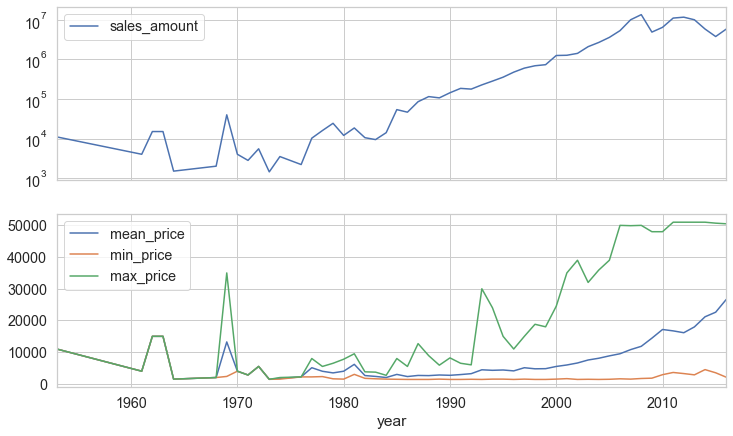

In [509]:
f,axes = plt.subplots(2, 1, figsize=(12, 7), sharex=True)
df_car_price.plot(kind='line', x='year', y='sales_amount', logy=True, ax=axes[0])
df_car_price.plot(kind='line', x='year', y='mean_price', ax=axes[1])
df_car_price.plot(kind='line', x='year', y='min_price', ax=axes[1])
df_car_price.plot(kind='line', x='year', y='max_price', ax=axes[1])

In [533]:
explode = tuple(np.ones(4)/35)
print(explode)

(0.02857142857142857, 0.02857142857142857, 0.02857142857142857, 0.02857142857142857)


Text(0, 0.5, 'Engine Type')

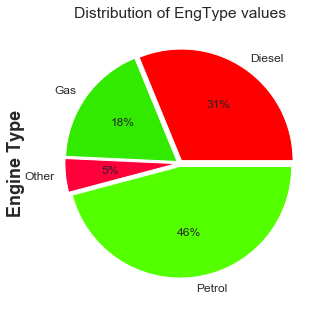

In [537]:
# Lets see the various values for 'engType' along with their share
df_car.groupby(df_car['engType']).count()['car'].plot(kind='pie', autopct='%1.0f%%', 
                                                     figsize=(5, 8), fontsize=12, cmap='prism', explode=explode)
plt.title('Distribution of EngType values')
plt.ylabel('Engine Type', fontsize=18, fontweight="bold", labelpad=15)

In [538]:
explode_body = tuple(np.ones(6)/50)
print(explode_body)

(0.02, 0.02, 0.02, 0.02, 0.02, 0.02)


Text(0, 0.5, 'Body Type')

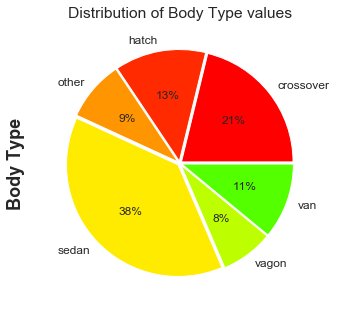

In [539]:
# Lets see the various values for 'body' along with their share
df_car.groupby(df_car['body']).count()['car'].plot(kind='pie', autopct='%1.0f%%', 
                                                     figsize=(5, 8), fontsize=12, cmap='prism', explode=explode_body)
plt.title('Distribution of Body Type values')
plt.ylabel('Body Type', fontsize=18, fontweight="bold", labelpad=15)

In [594]:
df_car.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive', 'df_decades'],
      dtype='object')

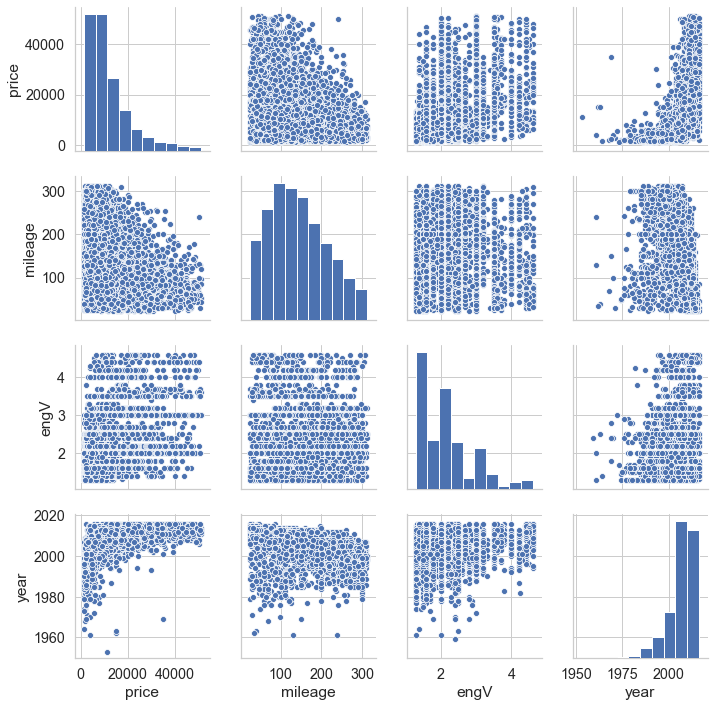

In [595]:
sns.pairplot(df_car)

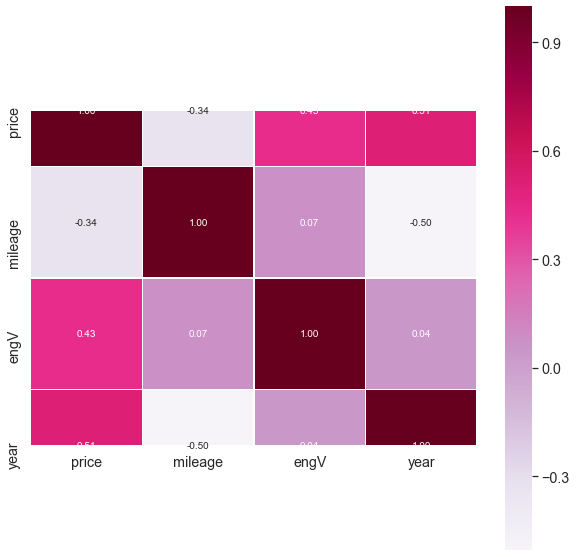

In [596]:
corr_mat = df_car.corr()
#print(corr_mat)
#ylables=['price', 'mileage', 'engV', 'year', 'Drive_front', 'Drive_full', 'Drive_rear', 'Drive_nan']
plt.figure(figsize =(10, 10))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='PuRd', square=True, linewidth=0.5 )
#ax.set_xticklabels(list(df['Q Code']), rotation=70)
#ax.set_yticklabels(ylables, minor=True, rotation=45)

In [601]:
df_car.columns.shape

(26,)

In [607]:
profile = ProfileReport(df_car, title='Pandas Post-Profiling Report on Car Sales Data', html={'style':{'full_width':True}})
profile.to_file(output_file='Post-profile car sales.html')

#### Profile Reports
- Please find the Post-profile report submitted with the package along with Pre-profile 